# FRB maps

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import pandas as pd

## Input Fermi-LAT catalog map 

In [3]:
LATCatalog = fits.open('Catalogs/gll_psc_v31.fit')

**LAT 12-year Source Catalog (4FGL-DR3)**

The Large Area Telescope (LAT) on board NASA's Fermi Gamma-ray Space Telescope (launched June 11, 2008) surveys the entire sky each day. This web page presents an incremental version (4FGL-DR3, for Data Release 3) of the fourth full catalog of LAT sources, based on 12 years of survey data in the 50 MeV-1 TeV energy range. For a full explanation about the catalog and its construction see the DR3 paper and the 4FGL paper. The DR3 analysis fits more sources with curved spectra, it introduces a more robust spectral parametrization for pulsars, and the spectral points are extended to 1 TeV. Please cite both papers when you use this data release.

The source designation is the same as 4FGL, 4FGL JHHMM.m+DDMM(c,e,i,s) where the 4 refers to the fourth catalog (1FGL was released at 1 year, 2FGL at 2 years, and 3FGL at 4 years) and FGL represents Fermi Gamma-ray LAT. In 4FGL-DR3, the "DataRelease" column set to either 1, 2 or 3 allows telling new sources from original 4FGL sources. The optional "e", "i" and "s" designators are explained in the caveats below. The 4FGL-DR3 does not include 2-month light curves that were in the [4FGL catalog](https://fermi.gsfc.nasa.gov/ssc/data/access/lat/12yr_catalog/).

In [4]:
LATCatalog.info()

Filename: Catalogs/gll_psc_v31.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  LAT_Point_Source_Catalog    1 BinTableHDU    457   6659R x 79C   [18A, I, E, E, E, E, E, E, E, E, E, E, I, 18A, E, E, E, E, E, E, 17A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 8E, 16E, 8E, 8E, E, E, E, E, E, E, D, E, 12E, 24E, 12E, 18A, 18A, 18A, 18A, 18A, 18A, A, 30A, 5A, 10A, 28A, 28A, E, E, D, D, E, I]   
  2  ExtendedSources    1 BinTableHDU     76   78R x 11C   [17A, E, E, E, E, 11A, E, E, E, 11A, 24A]   
  3  ROIs          1 BinTableHDU    127   1988R x 12C   [I, E, E, E, E, E, E, E, E, E, E, E]   
  4  Components    1 BinTableHDU     55   19R x 9C   [E, E, I, I, E, E, E, I, I]   
  5  EnergyBounds    1 BinTableHDU     56   20R x 10C   [E, E, E, I, I, E, E, E, I, I]   
  6  Hist_Start    1 BinTableHDU     23   13R x 1C   [D]   
  7  GTI           1 BinTableHDU     37   69107R x 2C   [D, D]   


In [4]:
LATCatalog[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  849 /   length of dimension 1                        
NAXIS2  =                 6659 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   79 /   number of table fields                       
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [5]:
Fermi_catalog = Table(LATCatalog[1].data)
Fermi_catalog

<Table length=6659>
   Source_Name     DataRelease RAJ2000  DEJ2000  ...   RA_Counterpart     DEC_Counterpart   Unc_Counterpart Flags
      str18           int16    float32  float32  ...      float64             float64           float32     int16
------------------ ----------- -------- -------- ... ------------------ ------------------- --------------- -----
4FGL J0000.3-7355            1   0.0983  -73.922 ...                nan                 nan             nan     0
4FGL J0000.5+0743            2   0.1375   7.7273 ...                nan                 nan             nan     0
4FGL J0000.7+2530            3   0.1878  25.5153 ...                nan                 nan             nan     0
4FGL J0001.2+4741            1   0.3126  47.6859 ...          0.3293408       47.7002009361         8.4e-07     0
4FGL J0001.2-0747            1   0.3151  -7.7971 ...          0.3251038        -7.774144975         1.8e-07     0
4FGL J0001.4-0010            3   0.3717  -0.1699 ... 0.3395400047302246 -0.1944199949502945          0.0045     0
4FGL J0001.5+2113            1   0.3815  21.2183 ...          0.3848771       21.2267429583         3.4e-07     0
4FGL J0001.6+3503            3   0.4098  35.0573 ...                nan                 nan             nan     0
4FGL J0001.6-4156            1   0.4165 -41.9425 ...     0.386479595833      -41.9237053972         6.9e-05     2
               ...         ...      ...      ... ...                ...                 ...             ...   ...
4FGL J2359.0-3038            1 359.7719 -30.6367 ...      359.782931004      -30.6279650528         1.1e-06     0
4FGL J2359.1+1719            1 359.7756  17.3225 ...       359.75488035       17.3237807889         7.1e-07     0
4FGL J2359.2-3134            2 359.8167 -31.5832 ... 359.89788818359375  -31.56217384338379         9.7e-08    16
4FGL J2359.3+0215            2 359.8329   2.2603 ...  359.8210144042969   2.255638837814331          0.0045     0
4FGL J2359.3+2502            3 359.8342  25.0416 ...                nan                 nan             nan     0
4FGL J2359.3-2049            1 359.8357 -20.8189 ...      359.831390913      -20.7988971833           1e-06     0
4FGL J2359.3+1444            1  359.839  14.7498 ...                nan                 nan             nan     2
4FGL J2359.7-5041            3 359.9365 -50.6853 ...  359.9483642578125  -50.70927810668945          0.0045     0
4FGL J2359.9-3736            1 359.9816  -37.616 ...       0.0350590375      -37.6390759444   3.2783254e-07     0
4FGL J2359.9+3145            3 359.9908  31.7601 ... 359.98040771484375  31.766666412353516          0.0045     0

## Fermi-LAT catalog maps

### J2000 coordinate

In [6]:
Fermi_ICRS = SkyCoord(Fermi_catalog['RAJ2000'], Fermi_catalog['DEJ2000'],frame='icrs', unit=(u.deg, u.deg))

In [7]:
Fermi_ICRS

<SkyCoord (ICRS): (ra, dec) in deg
    [(9.830000e-02, -73.922 ), (1.375000e-01,   7.7273),
     (1.878000e-01,  25.5153), ..., (3.599365e+02, -50.6853),
     (3.599816e+02, -37.616 ), (3.599908e+02,  31.7601)]>

In [8]:
Fermi_ICRS.ra.degree

array([9.830000e-02, 1.375000e-01, 1.878000e-01, ..., 3.599365e+02,
       3.599816e+02, 3.599908e+02], dtype=float32)

(array([ 76.,  54.,  55.,  53.,  65.,  55.,  58.,  45.,  65.,  66.,  54.,
         51.,  47.,  56.,  56.,  53.,  54.,  42.,  51.,  50.,  53.,  58.,
         55.,  78.,  46.,  63.,  60.,  40.,  55.,  52.,  48.,  53.,  72.,
         65.,  60.,  64.,  68.,  64.,  52.,  51.,  52.,  64.,  68.,  60.,
         64.,  67.,  65.,  78.,  45.,  72.,  85.,  76.,  52.,  49.,  70.,
         68.,  65.,  65.,  74.,  76.,  64.,  67.,  70.,  78.,  62.,  73.,
         73.,  74.,  96., 100.,  84., 104., 128., 148., 129., 127., 111.,
        112., 110., 109.,  82.,  51.,  63.,  68.,  57.,  66.,  77.,  50.,
         70.,  45.,  55.,  48.,  50.,  53.,  56.,  54.,  31.,  78.,  42.,
         66.]),
 array([9.83000025e-02, 3.69722509e+00, 7.29615021e+00, 1.08950758e+01,
        1.44940004e+01, 1.80929260e+01, 2.16918507e+01, 2.52907753e+01,
        2.88897018e+01, 3.24886246e+01, 3.60875511e+01, 3.96864777e+01,
        4.32854004e+01, 4.68843269e+01, 5.04832535e+01, 5.40821762e+01,
        5.76811028e+01, 6.1280

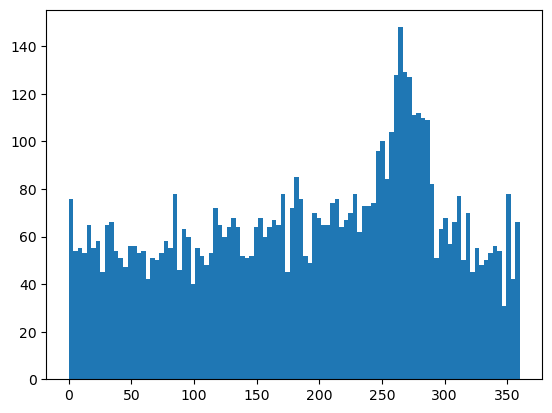

In [9]:
plt.hist(Fermi_ICRS.ra.degree,100)

In [10]:
Fermi_ICRS.dec.degree

array([-73.922 ,   7.7273,  25.5153, ..., -50.6853, -37.616 ,  31.7601],
      dtype=float32)

(array([  5.,   5.,  16.,   9.,  14.,  18.,  17.,  19.,  26.,  29.,  41.,
         45.,  37.,  64.,  94., 104.,  85.,  72.,  64.,  88.,  76.,  82.,
        104., 109., 108.,  96.,  82.,  98.,  76.,  83.,  86., 112., 110.,
        121., 101., 135.,  98.,  92.,  84.,  88., 100.,  83.,  89., 102.,
         96.,  87., 103.,  81.,  96.,  80.,  95.,  76.,  92., 103.,  66.,
         84.,  91.,  78.,  84.,  80.,  60.,  77.,  80.,  82.,  73.,  82.,
         71.,  72.,  77.,  71.,  91.,  80.,  77.,  74.,  62.,  61.,  62.,
         65.,  64.,  50.,  46.,  57.,  62.,  52.,  63.,  39.,  42.,  51.,
         46.,  34.,  33.,  28.,  25.,  25.,  13.,  18.,  17.,   9.,   6.,
          3.]),
 array([-87.68609619, -85.92185974, -84.15762329, -82.39338684,
        -80.62915039, -78.86491394, -77.10067749, -75.33644104,
        -73.57219696, -71.80796051, -70.04372406, -68.27948761,
        -66.51525116, -64.75101471, -62.98677826, -61.22254181,
        -59.45830536, -57.69406891, -55.92982864, -54.16559219

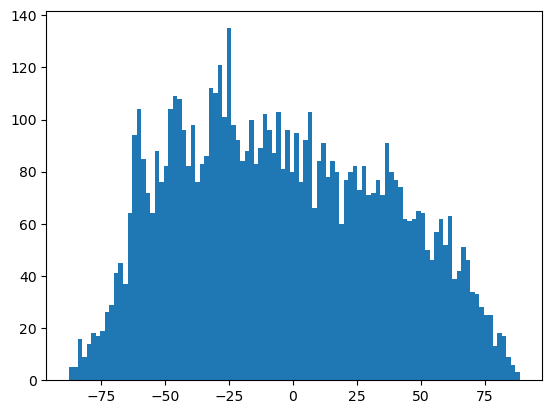

In [11]:
plt.hist(Fermi_ICRS.dec.degree,100)

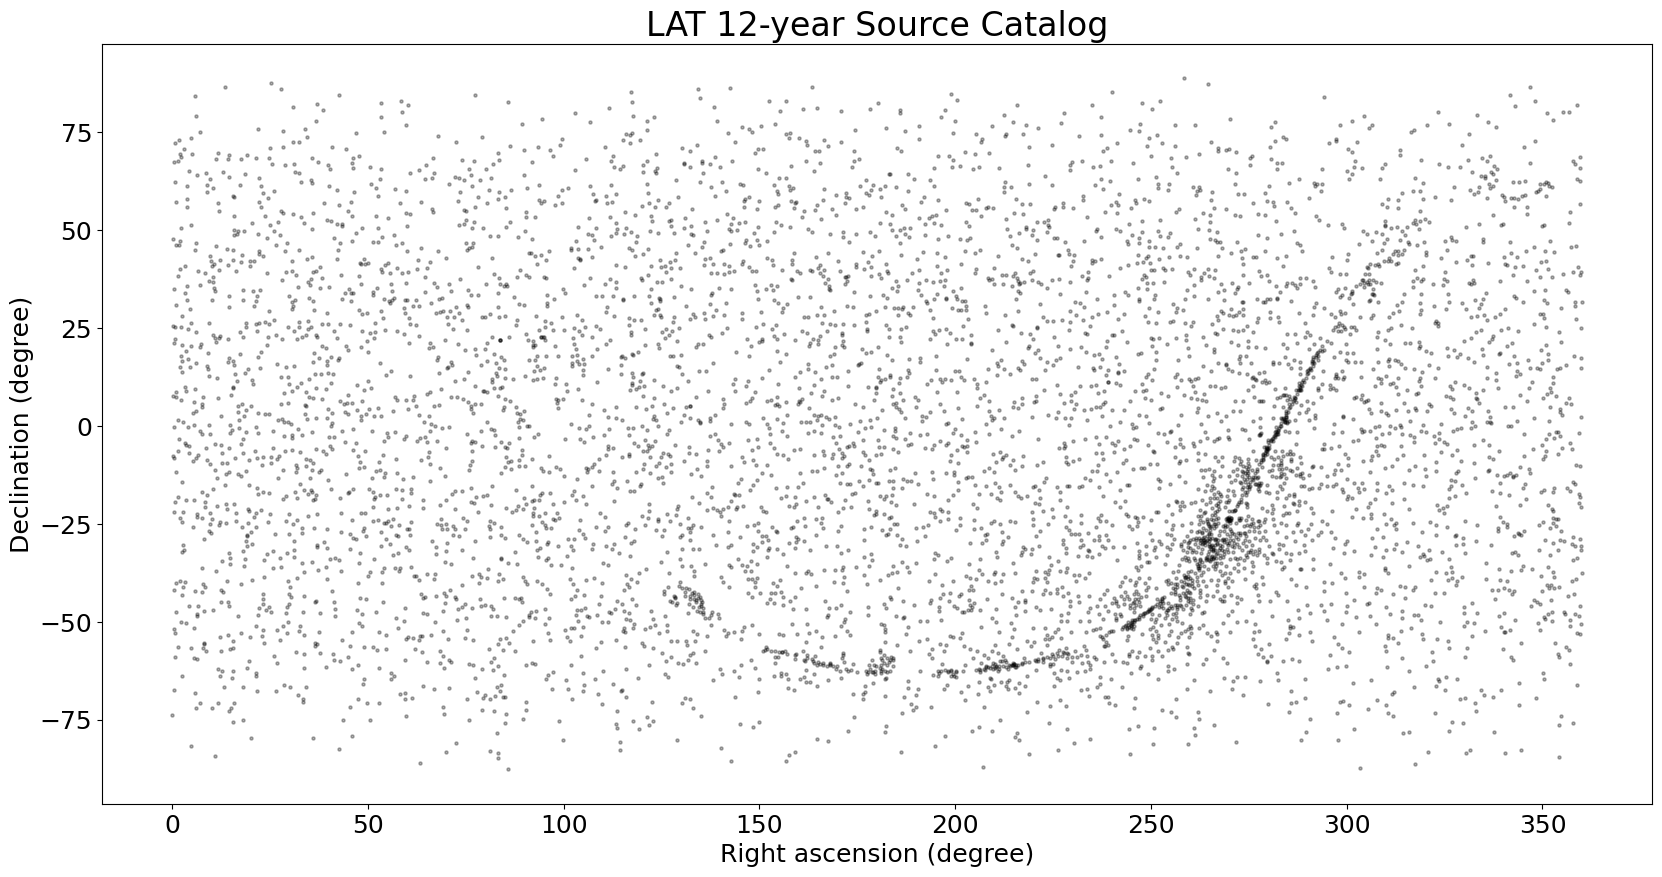

In [12]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1, aspect='equal')
ax.scatter(Fermi_ICRS.ra.degree, Fermi_ICRS.dec.degree, s=5, color='black', alpha=0.3)
ax.set_xlabel("Right ascension (degree)", fontsize=18)
ax.set_ylabel("Declination (degree)", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_title("LAT 12-year Source Catalog", fontsize=24)
plt.show()

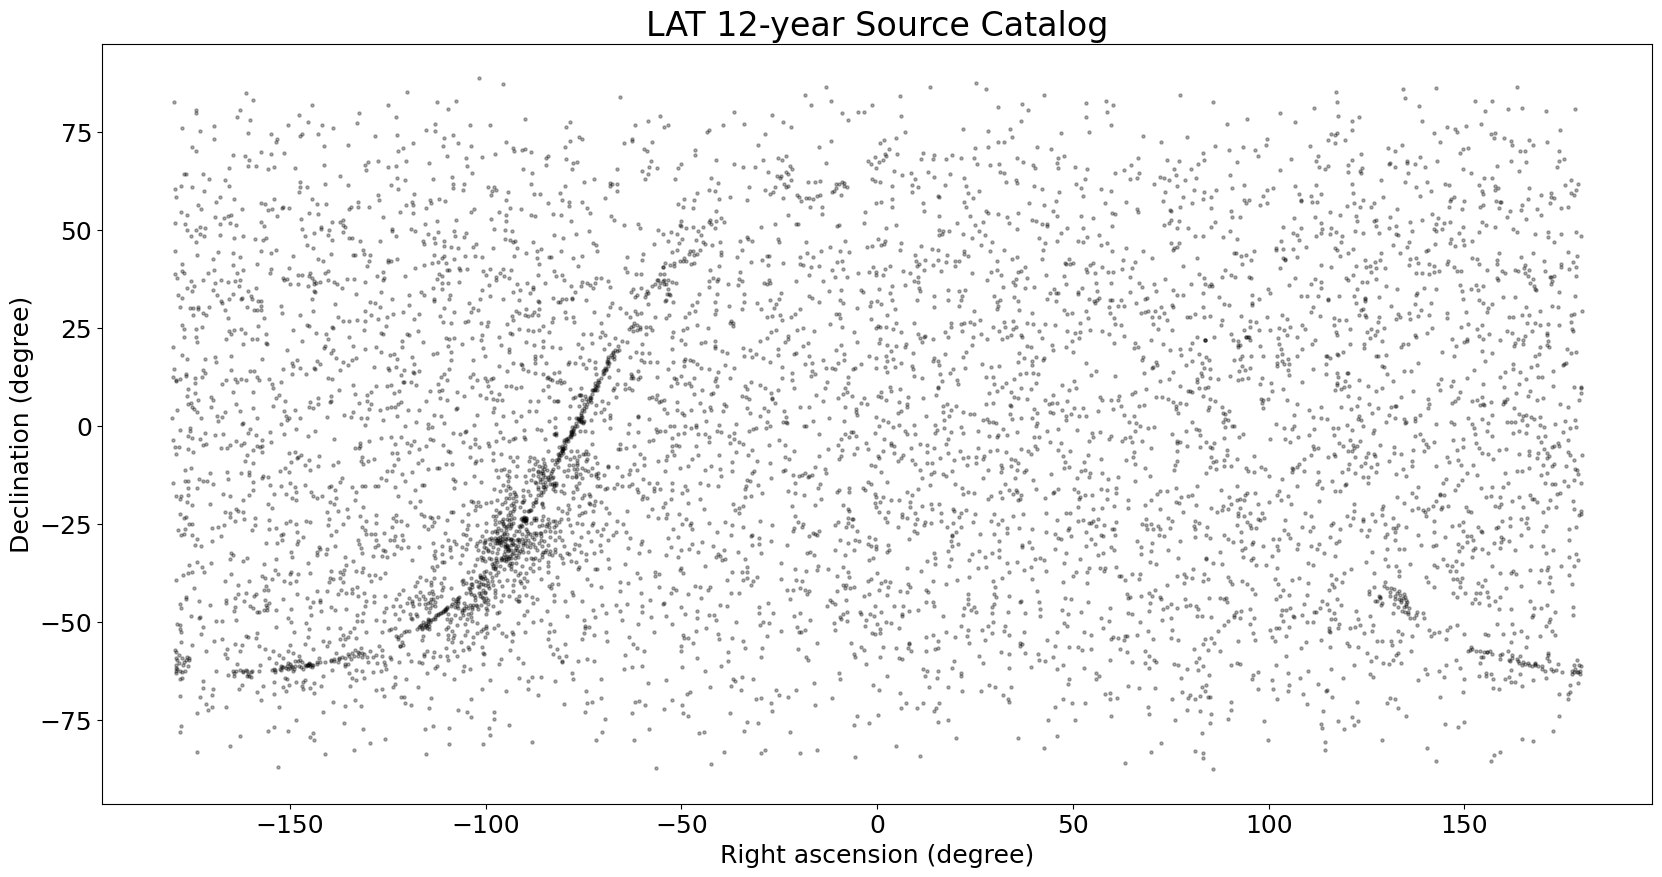

In [13]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1, aspect='equal')
ax.scatter(Fermi_ICRS.ra.wrap_at('180d').degree, Fermi_ICRS.dec.degree, s=5, color='black', alpha=0.3)
ax.set_xlabel("Right ascension (degree)", fontsize=18)
ax.set_ylabel("Declination (degree)", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_title("LAT 12-year Source Catalog", fontsize=24)
plt.show()

In [14]:
Fermi_ICRS.ra

<Longitude [9.830000e-02, 1.375000e-01, 1.878000e-01, ..., 3.599365e+02,
            3.599816e+02, 3.599908e+02] deg>

In [15]:
Fermi_ICRS.ra.wrap_at('180d')

<Longitude [ 0.0983    ,  0.1375    ,  0.1878    , ..., -0.06350708,
            -0.0184021 , -0.00918579] deg>

In [16]:
Fermi_ICRS.ra.wrap_at('180d').radian

array([ 0.00171566,  0.00239983,  0.00327773, ..., -0.00110841,
       -0.00032118, -0.00016032], dtype=float32)

In [17]:
Fermi_ICRS.dec.radian

array([-1.2901822 ,  0.13486683,  0.445326  , ..., -0.8846253 ,
       -0.65652305,  0.5543183 ], dtype=float32)

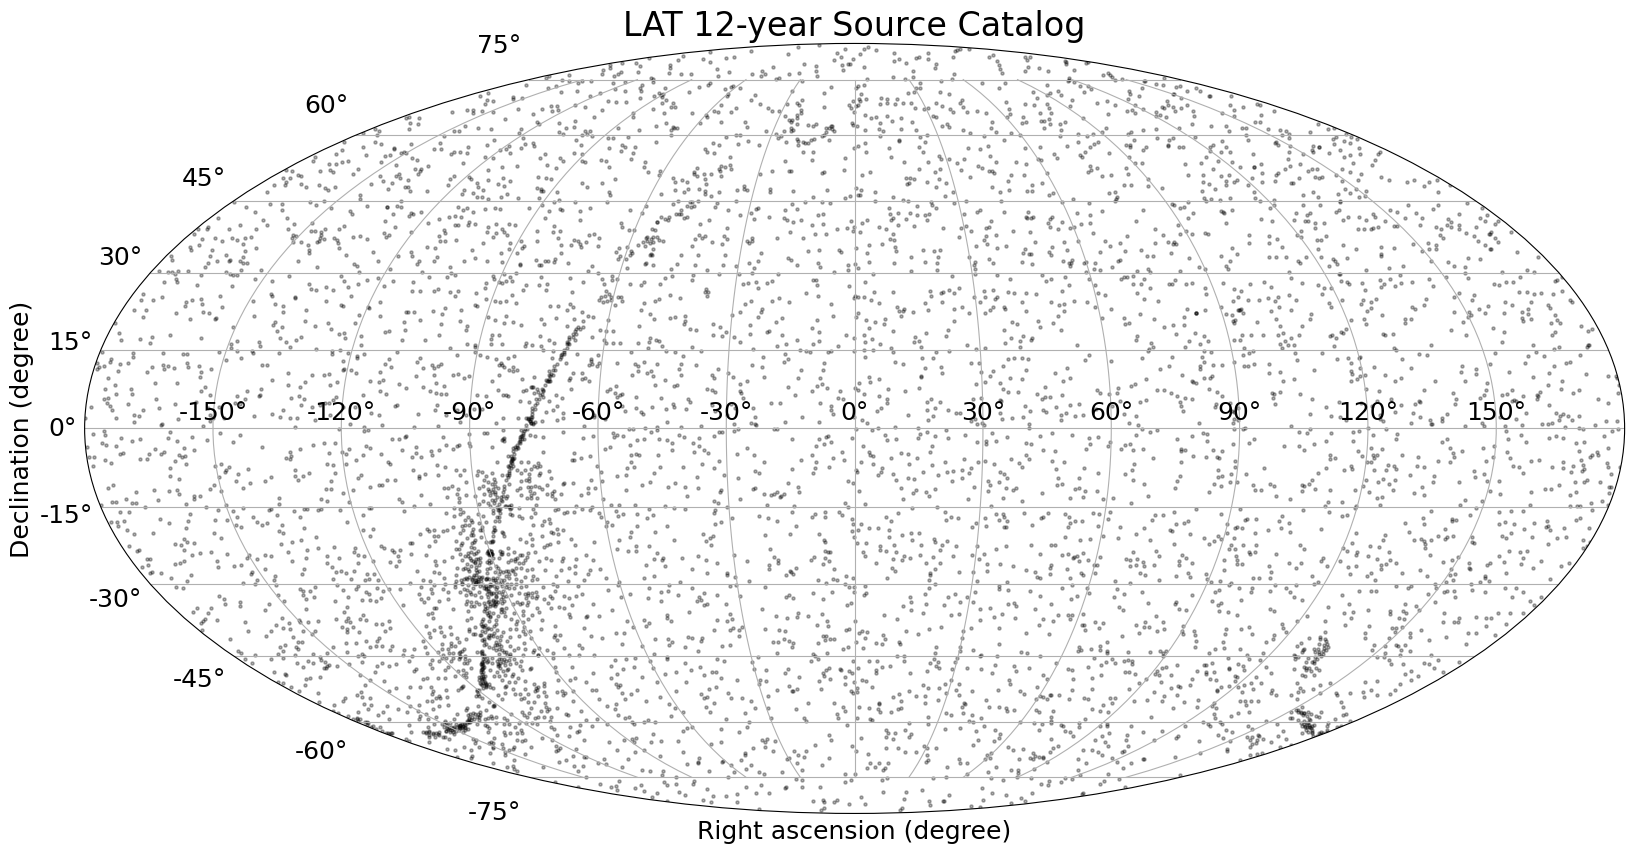

In [18]:
plt.figure(figsize=(20,10))
ax = plt.subplot(projection='mollweide')
ax.scatter(Fermi_ICRS.ra.wrap_at('180d').radian, Fermi_ICRS.dec.radian, s=5, color='black', alpha=0.3)
ax.grid(alpha=1)
ax.set_xlabel("Right ascension (degree)", fontsize=18)
ax.set_ylabel("Declination (degree)", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_title("LAT 12-year Source Catalog", fontsize=24)
plt.show()

### Galactic coordinate

In [19]:
Fermi_Gal = Fermi_ICRS.galactic
Fermi_Gal

<SkyCoord (Galactic): (l, b) in deg
    [(307.70900039, -42.72954071), (101.65649027, -53.0294557 ),
     (108.7750795 , -35.9591735 ), ..., (322.12806532, -64.47275329),
     (345.66286525, -74.91962254), (110.32101986, -29.84801013)]>

In [20]:
Fermi_Gal.l.degree

array([307.70900039, 101.65649027, 108.7750795 , ..., 322.12806532,
       345.66286525, 110.32101986])

(array([ 54.,  54.,  59.,  56.,  60.,  46.,  50.,  41.,  45.,  47.,  40.,
         48.,  66.,  57.,  49.,  46.,  56.,  57.,  46.,  58.,  55.,  43.,
         73.,  88.,  67.,  68.,  56.,  74.,  69.,  70.,  71.,  56.,  86.,
         53.,  73.,  70.,  89.,  81.,  96.,  69.,  81.,  68.,  99., 100.,
         99.,  95.,  79.,  76., 100., 116., 119., 106.,  80.,  84.,  81.,
         78.,  86.,  84.,  60.,  64.,  56.,  75.,  57.,  74.,  69.,  69.,
         53.,  76.,  64.,  62.,  64.,  51.,  50.,  70.,  71.,  59.,  48.,
         58.,  56.,  65.,  78.,  54.,  61.,  71.,  53.,  74.,  64.,  67.,
         47.,  64.,  59.,  62.,  58.,  66.,  69.,  45.,  54.,  58.,  58.,
         53.]),
 array([-1.79987963e+02, -1.76388259e+02, -1.72788555e+02, -1.69188851e+02,
        -1.65589147e+02, -1.61989443e+02, -1.58389739e+02, -1.54790035e+02,
        -1.51190332e+02, -1.47590628e+02, -1.43990924e+02, -1.40391220e+02,
        -1.36791516e+02, -1.33191812e+02, -1.29592108e+02, -1.25992404e+02,
        -1.223

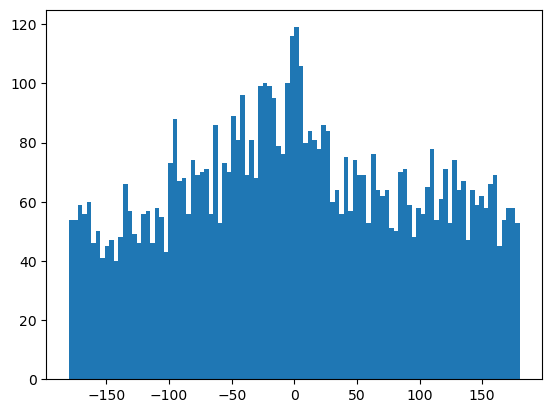

In [21]:
plt.hist(Fermi_Gal.l.wrap_at('180d'),100)

In [22]:
Fermi_Gal.b.degree

array([-42.72954071, -53.0294557 , -35.9591735 , ..., -64.47275329,
       -74.91962254, -29.84801013])

(array([  6.,   6.,  15.,  12.,  14.,  14.,  17.,  29.,  20.,  30.,  34.,
         38.,  33.,  43.,  44.,  41.,  46.,  45.,  39.,  41.,  54.,  49.,
         51.,  51.,  70.,  54.,  60.,  70.,  59.,  68.,  62.,  76.,  64.,
         70.,  68.,  64.,  76.,  93.,  92., 100.,  89.,  85., 105.,  93.,
        114., 122., 138., 155., 179., 466., 196., 192., 133., 116., 106.,
         92.,  94.,  85.,  74.,  88., 110.,  93.,  77.,  97.,  60.,  63.,
         91.,  80.,  77.,  75.,  74.,  66.,  70.,  64.,  80.,  56.,  61.,
         60.,  48.,  54.,  49.,  55.,  47.,  50.,  36.,  30.,  45.,  33.,
         37.,  40.,  17.,  29.,  13.,  15.,  13.,  20.,  14.,  10.,   8.,
          2.]),
 array([-87.96936298, -86.20284711, -84.43633124, -82.66981538,
        -80.90329951, -79.13678364, -77.37026777, -75.6037519 ,
        -73.83723603, -72.07072017, -70.3042043 , -68.53768843,
        -66.77117256, -65.00465669, -63.23814082, -61.47162496,
        -59.70510909, -57.93859322, -56.17207735, -54.40556148

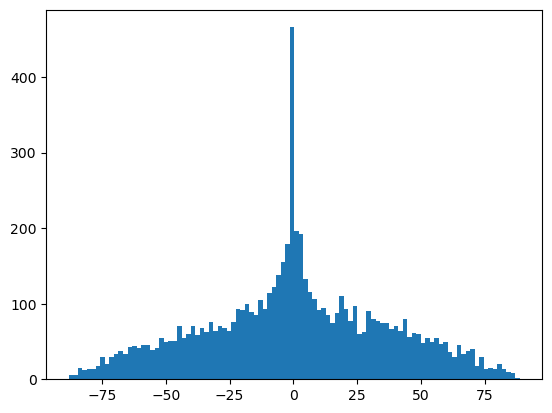

In [23]:
plt.hist(Fermi_Gal.b.degree,100)

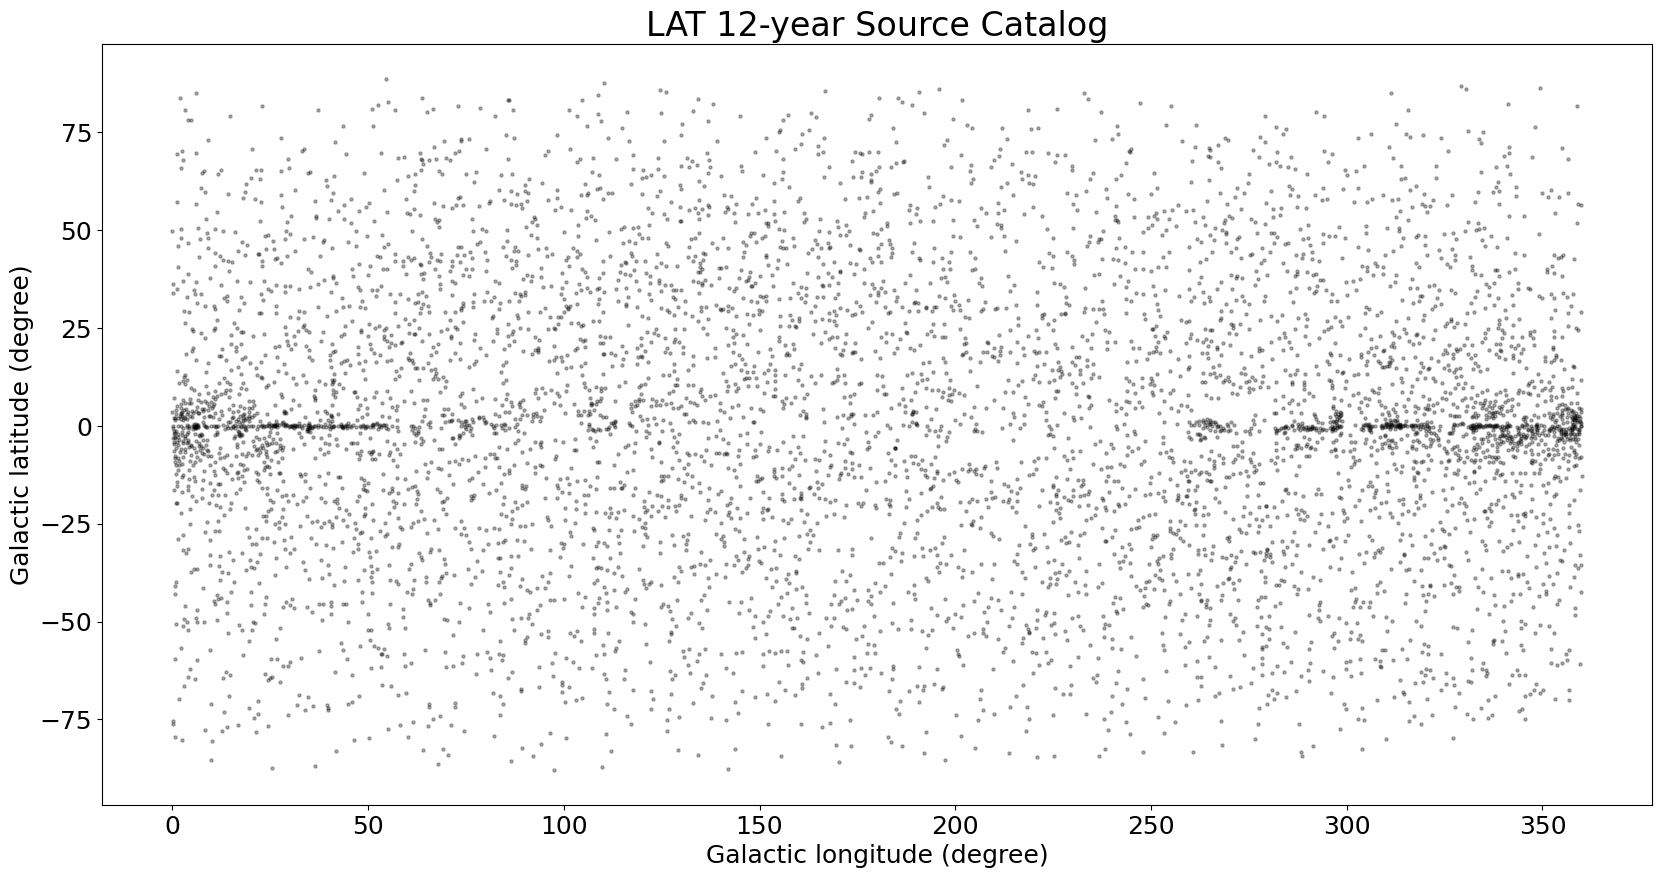

In [24]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1, aspect='equal')
ax.scatter(Fermi_Gal.l.degree, Fermi_Gal.b.degree, s=5, color='black', alpha=0.3)
ax.set_xlabel("Galactic longitude (degree)", fontsize=18)
ax.set_ylabel("Galactic latitude (degree)", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_title("LAT 12-year Source Catalog", fontsize=24)
plt.show()

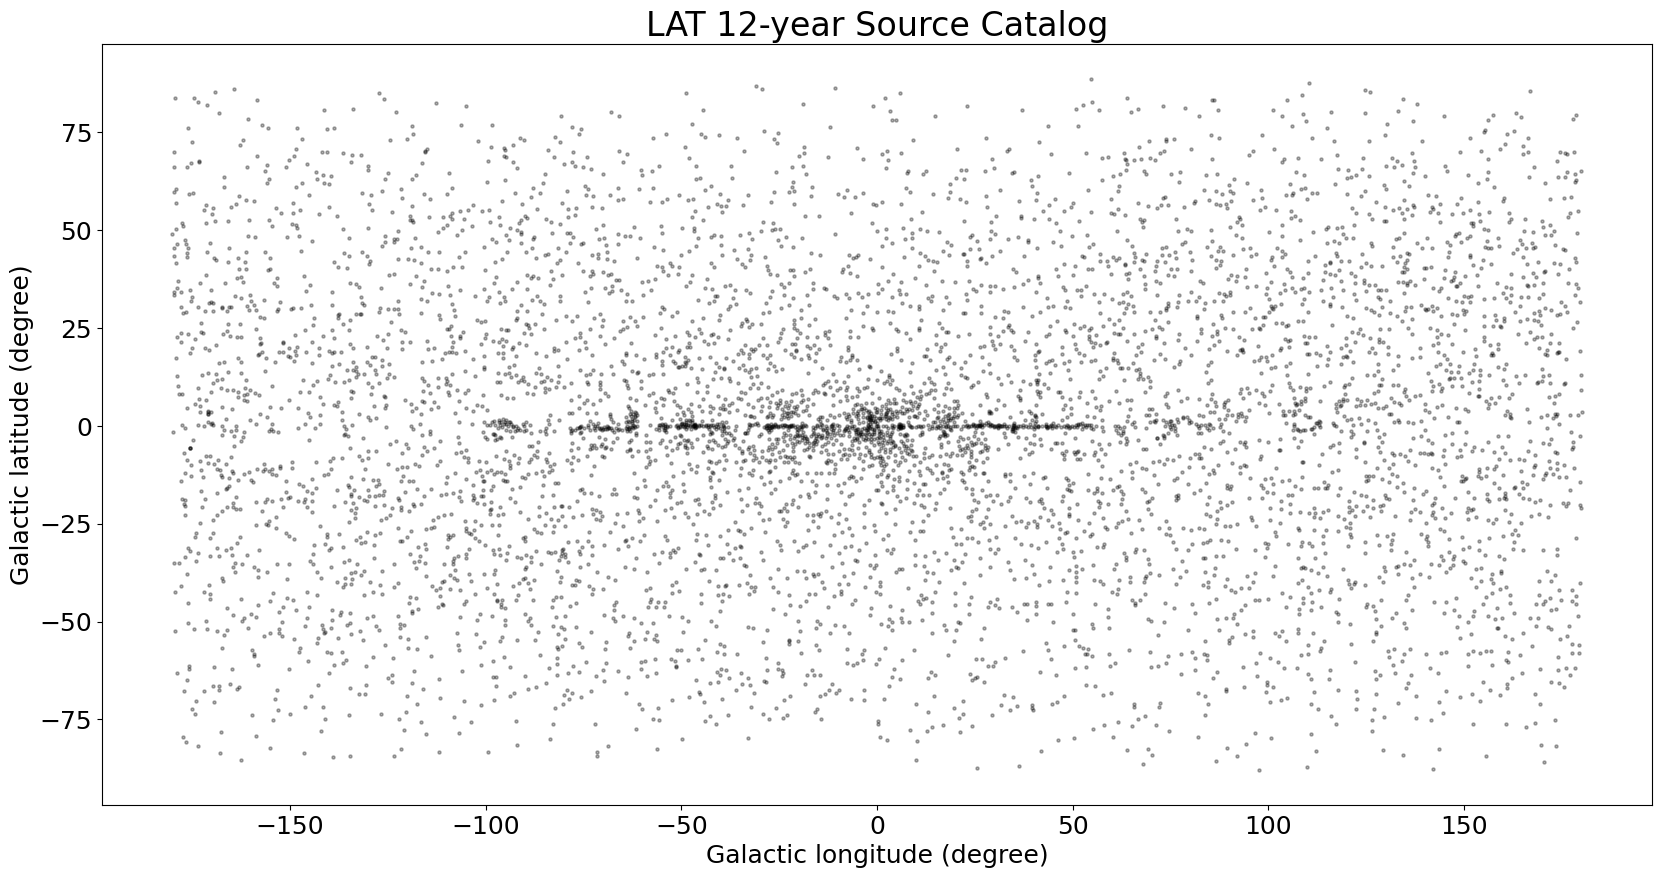

In [25]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1, aspect='equal')
ax.scatter(Fermi_Gal.l.wrap_at('180d').degree, Fermi_Gal.b.degree, s=5, color='black', alpha=0.3)
ax.set_xlabel("Galactic longitude (degree)", fontsize=18)
ax.set_ylabel("Galactic latitude (degree)", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_title("LAT 12-year Source Catalog", fontsize=24)
plt.show()

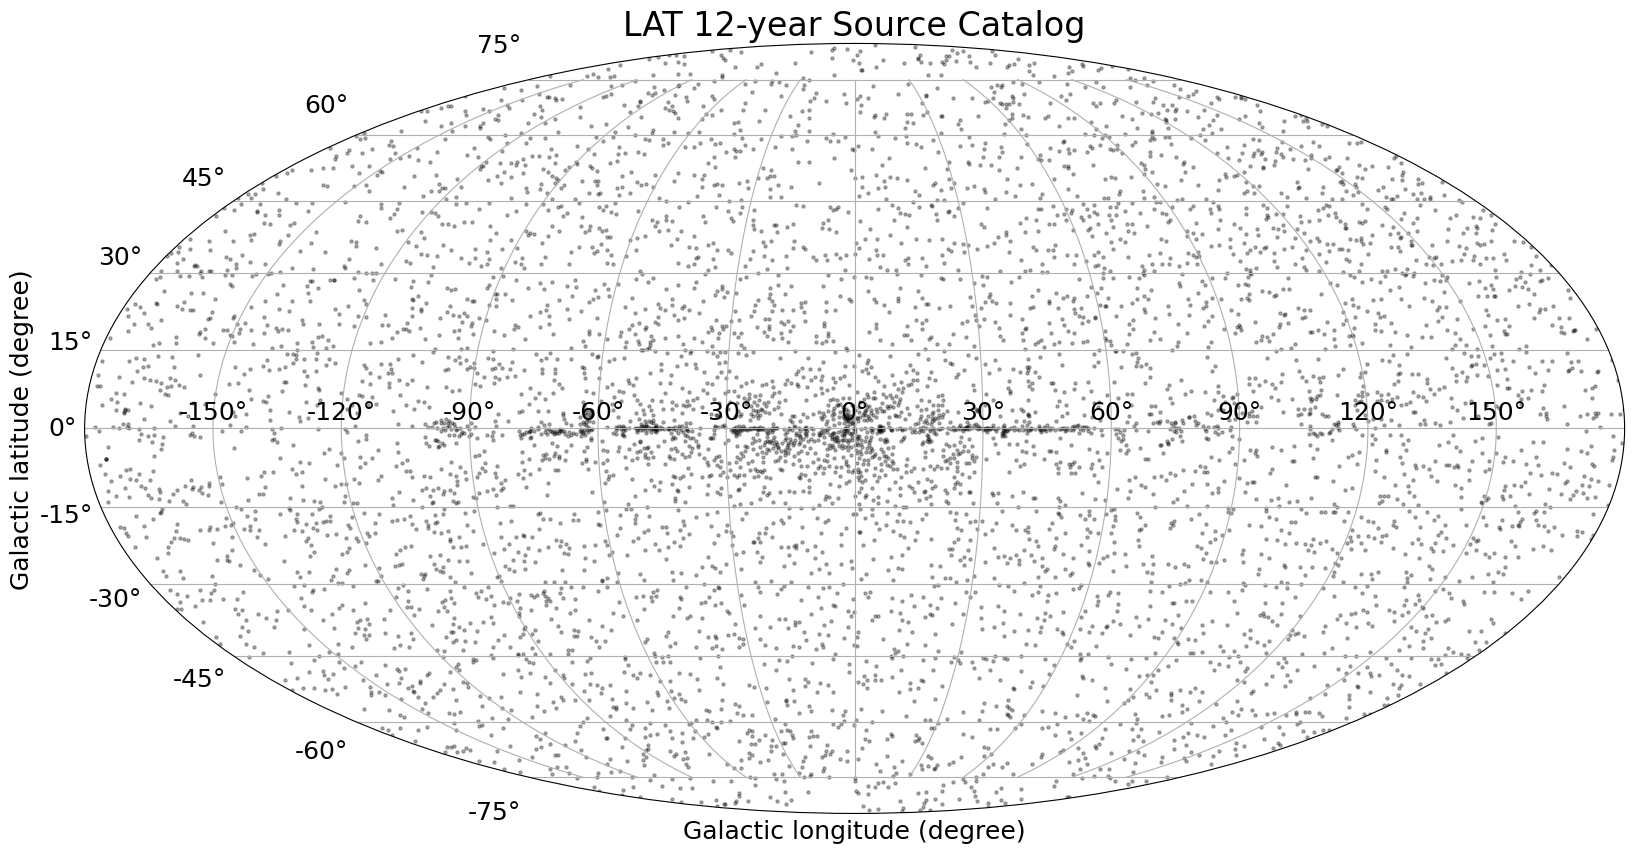

In [26]:
plt.figure(figsize=(20,10))
ax = plt.subplot(projection='mollweide')
ax.scatter(Fermi_Gal.l.wrap_at('180d').radian, Fermi_Gal.b.radian, s=5, color='black', alpha=0.3)
ax.grid(alpha=1)
ax.set_xlabel("Galactic longitude (degree)", fontsize=18)
ax.set_ylabel("Galactic latitude (degree)", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_title("LAT 12-year Source Catalog", fontsize=24)
plt.show()

## Input repeater FRB catalog map 

In [6]:
df99 = pd.read_excel('Catalogs/Repeater_FRB.xlsx',header=None)#, names = columns)

In [7]:
name = df99[0:1]

In [8]:
name = np.array(name)
name = name[0]

In [9]:
name

array(['ID', 'Name', 'RA', 'DEC', 'Obj. Type',
       'Repeater of Primary Burst', 'DM', 'DM-Err', 'DM-Units',
       'Gal. DM Limit', 'Gal. DM Model', 'Barycentric Datetime',
       'Redshift', 'Host Name', 'Host Redshift', 'Reporting Group/s',
       'Discovery Data Source/s', 'Classifying Group/s',
       'Associated Group/s', 'Disc. Internal Name', 'Disc. Instrument/s',
       'Class. Instrument/s', 'TNS AT', 'Public', 'End Prop. Period',
       'Discovery Mag/Flux', 'Discovery Filter', 'Discovery Date (UT)',
       'Sender', 'Remarks', 'Discovery Bibcode',
       'Classification Bibcodes', 'Ext. catalog/s'], dtype=object)

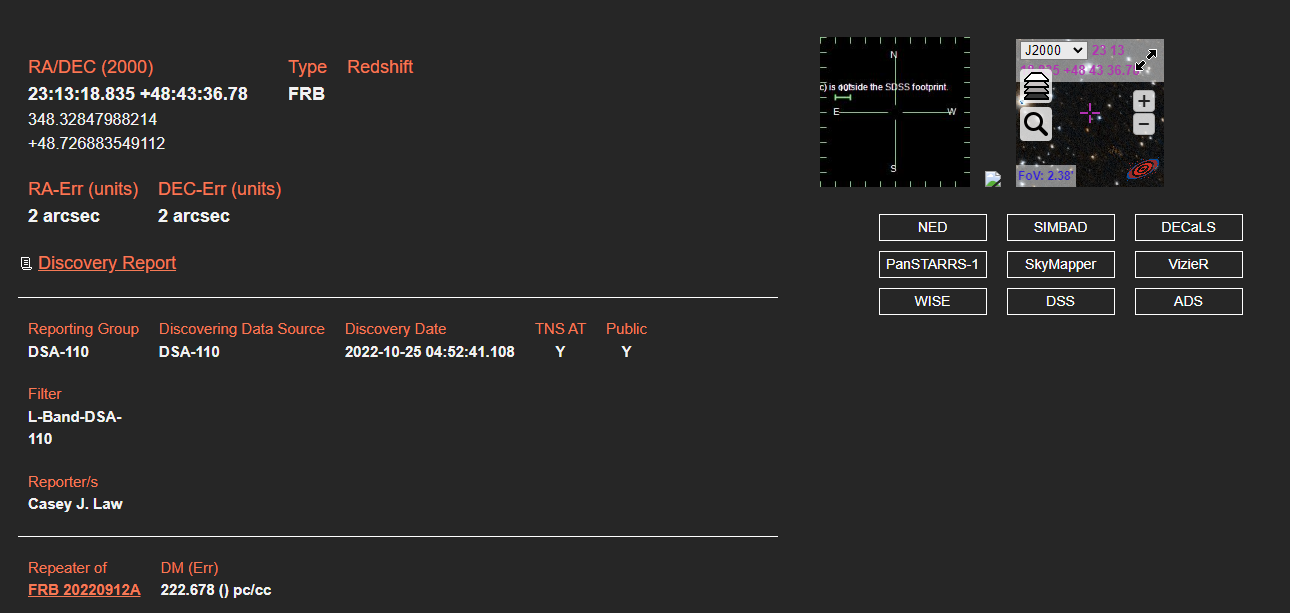

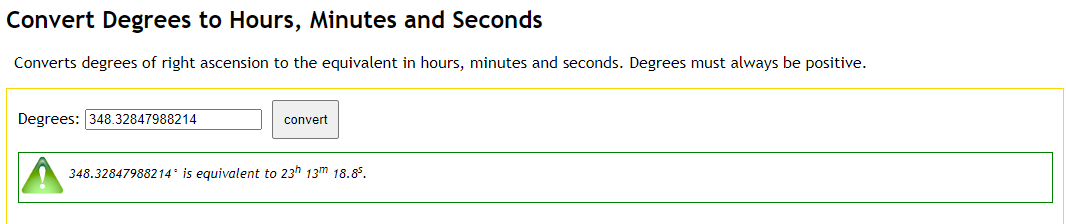

#################
Link : https://www.vercalendario.info/en/how/convert-ra-degrees-hours.html
#####################

In [16]:
df  = pd.read_excel('Catalogs/Repeater_FRB.xlsx',header=None, names = name, skiprows=[0])
df_Repeater = pd.read_excel('Catalogs/Repeater_FRB.xlsx',header=None, names = name, skiprows=[0])

In [17]:
df_Repeater

ID           Name            RA           DEC Obj. Type  \
0    124442  FRB 20221025A  23:13:18.835  +48:43:36.78       FRB   
1    124441  FRB 20221018A  23:13:55.355  +48:43:35.60       FRB   
2     92669  FRB 20210407C  05:08:03.000  +26:03:39.00       FRB   
3     92668  FRB 20210407B  05:08:03.000  +26:03:39.00       FRB   
4     92667  FRB 20210407A  05:08:03.000  +26:03:39.00       FRB   
..      ...            ...           ...           ...       ...   
201   64999  FRB 20150602B  05:32:01.000  +33:07:53.00       FRB   
202   64998  FRB 20150602A  05:32:01.000  +33:07:53.00       FRB   
203   64997  FRB 20150517B  05:32:01.000  +33:07:56.00       FRB   
204   64996  FRB 20150517A  05:32:01.000  +33:07:56.00       FRB   
205   64913  FRB 20121102A  05:32:09.000  +33:05:13.00       FRB   

    Repeater of Primary Burst       DM  DM-Err DM-Units  Gal. DM Limit  ...  \
0                   20220912A  222.678     NaN    pc/cc            NaN  ...   
1                   20220912A  228.260     NaN    pc/cc            NaN  ...   
2                   20201124A  409.000     4.0    pc/cc            NaN  ...   
3                   20201124A  413.000     3.0    pc/cc            NaN  ...   
4                   20201124A  424.000     2.0    pc/cc            NaN  ...   
..                        ...      ...     ...      ...            ...  ...   
201                 20121102A  558.000    10.0    pc/cc          188.0  ...   
202                 20121102A  555.000     3.0    pc/cc          188.0  ...   
203                 20121102A  566.000    10.0    pc/cc          188.0  ...   
204                 20121102A  560.000     4.0    pc/cc          188.0  ...   
205                 20121102A  557.000     2.0    pc/cc          188.0  ...   

    Public End Prop. Period  Discovery Mag/Flux  Discovery Filter  \
0        1              NaT                0.00    L-Band-DSA-110   
1        1              NaT                0.00    L-Band-DSA-110   
2        1       2021-09-25                 NaN               NaN   
3        1       2021-09-25                 NaN               NaN   
4        1       2021-09-25                 NaN               NaN   
..     ...              ...                 ...               ...   
201      1              NaT                0.02            Other-   
202      1              NaT                0.04            Other-   
203      1              NaT                0.03            Other-   
204      1              NaT                0.03            Other-   
205      1              NaT                0.40            Other-   

        Discovery Date (UT)      Sender Remarks    Discovery Bibcode  \
0   2022-10-25 04:52:41.108     DSA-110     NaN  2023TNSFR.294....1L   
1   2022-10-18 05:20:48.395     DSA-110     NaN  2023TNSFR.294....1L   
2   2021-04-07 09:08:40.076       Kumar     NaN  2021TNSFR3316....1K   
3   2021-04-07 06:14:56.340       Kumar     NaN  2021TNSFR3316....1K   
4   2021-04-07 06:14:00.084       Kumar     NaN  2021TNSFR3316....1K   
..                      ...         ...     ...                  ...   
201 2015-06-02 16:47:36.484  FRBCAT_bot     NaN  2020TNSFR2470....1P   
202 2015-06-02 16:38:07.575  FRBCAT_bot     NaN  2020TNSFR2470....1P   
203 2015-05-17 17:51:40.921  FRBCAT_bot     NaN  2020TNSFR2470....1P   
204 2015-05-17 17:42:08.712  FRBCAT_bot     NaN  2020TNSFR2470....1P   
205 2012-11-02 06:35:53.244  FRBCAT_bot     NaN  2020TNSFR2470....1P   

    Classification Bibcodes Ext. catalog/s  
0                       NaN            NaN  
1                       NaN            NaN  
2                       NaN            NaN  
3                       NaN            NaN  
4                       NaN            NaN  
..                      ...            ...  
201                     NaN            NaN  
202                     NaN            NaN  
203                     NaN            NaN  
204                     NaN            NaN  
205                     NaN            NaN  

[206 row

### Check repeater 

In [12]:
Repeater_burt = df_Repeater['Repeater of Primary Burst']
Repeater_burt

0      20220912A
1      20220912A
2      20201124A
3      20201124A
4      20201124A
         ...    
201    20121102A
202    20121102A
203    20121102A
204    20121102A
205    20121102A
Name: Repeater of Primary Burst, Length: 206, dtype: object

In [13]:
Repeater_burt

0      20220912A
1      20220912A
2      20201124A
3      20201124A
4      20201124A
         ...    
201    20121102A
202    20121102A
203    20121102A
204    20121102A
205    20121102A
Name: Repeater of Primary Burst, Length: 206, dtype: object

<Axes: xlabel='Repeater of Primary Burst', ylabel='Counts'>

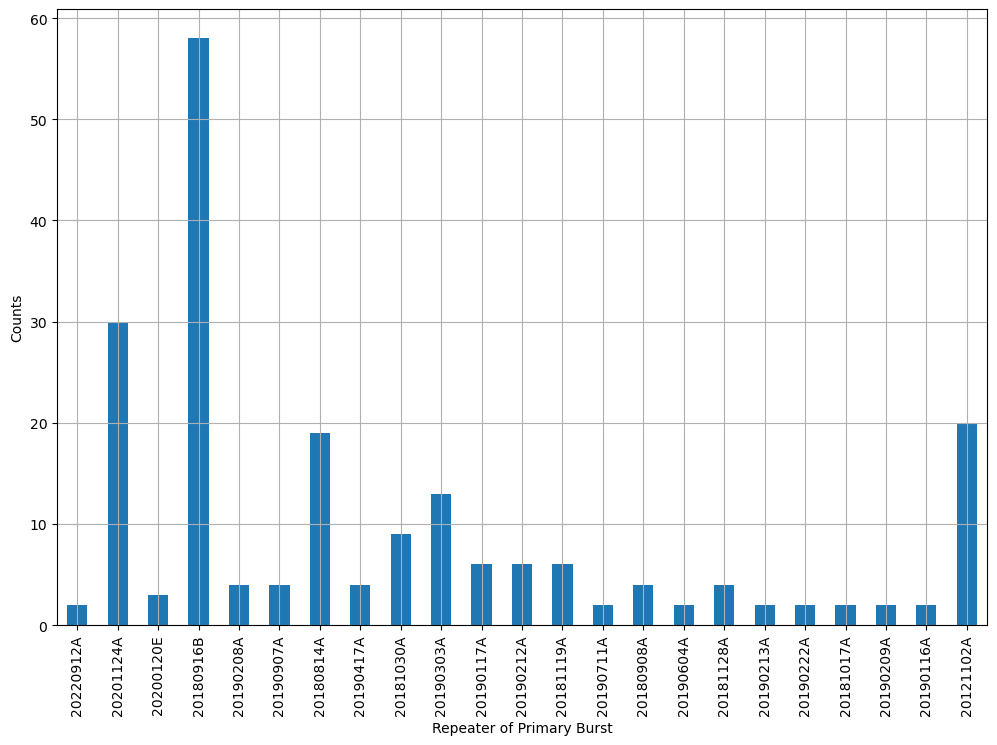

In [14]:
import pandas
from collections import Counter
letter_counts = Counter(Repeater_burt)
df_Repeater_burt = pandas.DataFrame.from_dict(letter_counts, orient='index')
df_Repeater_burt.plot(figsize=(12,8),kind='bar',legend=False,grid='minor',ylabel='Counts',xlabel='Repeater of Primary Burst',fontsize=10)

In [148]:
print(letter_counts)

Counter({'20180916B': 58, '20201124A': 30, '20121102A': 20, '20180814A': 19, '20190303A': 13, '20181030A': 9, '20190117A': 6, '20190212A': 6, '20181119A': 6, '20190208A': 4, '20190907A': 4, '20190417A': 4, '20180908A': 4, '20181128A': 4, '20200120E': 3, '20220912A': 2, '20190711A': 2, '20190604A': 2, '20190213A': 2, '20190222A': 2, '20181017A': 2, '20190209A': 2, '20190116A': 2})


In [27]:
Repeater_burst_names = sorted(letter_counts) 

In [28]:
Repeater_burst_names 

['20121102A',
 '20180814A',
 '20180908A',
 '20180916B',
 '20181017A',
 '20181030A',
 '20181119A',
 '20181128A',
 '20190116A',
 '20190117A',
 '20190208A',
 '20190209A',
 '20190212A',
 '20190213A',
 '20190222A',
 '20190303A',
 '20190417A',
 '20190604A',
 '20190711A',
 '20190907A',
 '20200120E',
 '20201124A',
 '20220912A']

In [ ]:
new_glon = np.logical_and(t['RAJ2000'] >=83.633-2.5, t['RAJ2000']<=83.633+2.5)

In [36]:
Test_1 = df_Repeater['Repeater of Primary Burst'] =='20180916B'

In [37]:
Test_1

0      False
1      False
2      False
3      False
4      False
       ...  
201    False
202    False
203    False
204    False
205    False
Name: Repeater of Primary Burst, Length: 206, dtype: bool

In [38]:
df_Repeater[Test_1]

ID           Name            RA           DEC Obj. Type  \
34   58774  FRB 20200423A  01:58:00.634  +65:43:00.63       FRB   
35   65034  FRB 20200324C  01:58:00.750  +65:43:00.31       FRB   
36   65033  FRB 20200324B  01:58:00.750  +65:43:00.31       FRB   
37   56446  FRB 20200324A  01:39:04.800  +65:42:36.00       FRB   
38   65032  FRB 20200323B  01:58:00.750  +65:43:00.31       FRB   
39   65030  FRB 20200323A  01:58:00.750  +65:43:00.31       FRB   
44   56441  FRB 20200221A  02:15:02.400  +65:43:48.00       FRB   
45   65029  FRB 20200220D  01:58:00.750  +65:43:00.31       FRB   
46   65028  FRB 20200220C  01:58:00.750  +65:43:00.31       FRB   
47   65027  FRB 20200220B  01:58:00.750  +65:43:00.31       FRB   
48   56440  FRB 20200220A  01:59:24.000  +65:43:12.00       FRB   
49   56439  FRB 20200219A  01:43:04.800  +65:42:36.00       FRB   
50   56438  FRB 20200204E  02:07:55.200  +65:43:48.00       FRB   
51   56437  FRB 20200204D  01:57:55.200  +65:43:48.00       FRB   
52   56436  FRB 20200204C  01:58:33.600  +65:43:48.00       FRB   
53   56435  FRB 20200204B  01:56:02.400  +65:43:48.00       FRB   
54   56434  FRB 20200204A  01:26:33.600  +72:18:36.00       FRB   
55   56433  FRB 20200203A  01:57:57.600  +65:43:48.00       FRB   
66   65025  FRB 20200120D  01:58:00.750  +65:43:00.31       FRB   
67   65024  FRB 20200120C  01:58:00.750  +65:43:00.31       FRB   
68   65023  FRB 20200120B  01:58:00.750  +65:43:00.31       FRB   
69   56423  FRB 20200120A  01:44:45.600  +65:43:48.00       FRB   
74   65022  FRB 20191219E  01:58:00.750  +65:43:00.31       FRB   
75   65021  FRB 20191219D  01:58:00.750  +65:43:00.31       FRB   
76   65020  FRB 20191219C  01:58:00.750  +65:43:00.31       FRB   
77   56418  FRB 20191219B  01:57:07.200  +65:43:48.00       FRB   
78   56417  FRB 20191219A  01:57:21.600  +65:43:48.00       FRB   
79   56416  FRB 20191218A  01:59:14.400  +65:43:48.00       FRB   
86   65019  FRB 20191115A  01:58:00.750  +65:43:00.31       FRB   
91   56405  FRB 20191030B  02:15:09.600  +65:44:24.00       FRB   
92   56404  FRB 20191030A  01:59:14.400  +65:43:12.00       FRB   
103  56393  FRB 20190825C  02:11:43.200  +65:43:48.00       FRB   
104  56392  FRB 20190825B  01:57:52.800  +65:43:12.00       FRB   
105  56391  FRB 20190825A  01:58:28.800  +65:43:48.00       FRB   
109  56387  FRB 20190810B  02:00:40.800  +65:43:48.00       FRB   
111  56385  FRB 20190809A  01:57:50.400  +65:43:48.00       FRB   
122  65018  FRB 20190619H  01:58:00.750  +65:43:00.31       FRB   
123  65017  FRB 20190619G  01:58:00.750  +65:43:00.31       FRB   
124  65016  FRB 20190619F  01:58:00.750  +65:43:00.31       FRB   
125  65015  FRB 20190619E  01:58:00.750  +65:43:00.31       FRB   
128  55121  FRB 20190605B  01:57:52.800  +65:43:48.00       FRB   
129  55120  FRB 20190605A  01:43:31.200  +65:43:12.00       FRB   
130  55884  FRB 20190604F  01:59:14.400  +65:43:48.00       FRB   
132  55117  FRB 20190603A  01:56:52.800  +65:43:48.00       FRB   
134  55116  FRB 20190519C  01:59:21.600  +65:43:48.00       FRB   
135  55115  FRB 20190519B  01:57:33.600  +65:44:24.00       FRB   
136  55114  FRB 20190519A  01:42:60.000  +65:43:48.00       FRB   
137  55113  FRB 20190518A  01:58:19.200  +65:43:48.00       FRB   
158  55097  FRB 20190126A  01:45:04.800  +65:43:48.00       FRB   
163  55092  FRB 20181226A  01:58:02.400  +65:44:24.00       FRB   
164  55091  FRB 20181225A  01:59:33.600  +65:43:48.00       FRB   
165  55090  FRB 20181223A  01:58:07.200  +65:44:24.00       FRB   
166  55089  FRB 20181222A  01:58:12.000  +65:44:24.00       FRB   
170  55586  FRB 20181120B  01:57:07.200  +65:44:24.00       FRB   
174  55085  FRB 20181104B  01:57:07.200  +65:44:24.00       FRB   
175  55084  FRB 20181104A  01:43:19.200  +65:43:48.00       FRB   
179  55080  FRB 20181019A  02:08:36.000  +65:44:24.00       FRB   
183  55523  FRB 20180916B  01:56:40.800  +65:44:24.00       FRB   

    Repeater of Primary Burst      DM  DM-Err DM-Units

### Change Convert Hours, Minutes and Seconds to Degrees

In [32]:
RA_Repeater = df['RA']
RA_Repeater

0      23:13:18.835
1      23:13:55.355
2      05:08:03.000
3      05:08:03.000
4      05:08:03.000
           ...     
201    05:32:01.000
202    05:32:01.000
203    05:32:01.000
204    05:32:01.000
205    05:32:09.000
Name: RA, Length: 206, dtype: object

In [33]:
DEC_Repeater = df['DEC']
DEC_Repeater

0      +48:43:36.78
1      +48:43:35.60
2      +26:03:39.00
3      +26:03:39.00
4      +26:03:39.00
           ...     
201    +33:07:53.00
202    +33:07:53.00
203    +33:07:56.00
204    +33:07:56.00
205    +33:05:13.00
Name: DEC, Length: 206, dtype: object

In [34]:
hrs = RA_Repeater.str[0:2]
hrs

0      23
1      23
2      05
3      05
4      05
       ..
201    05
202    05
203    05
204    05
205    05
Name: RA, Length: 206, dtype: object

In [35]:
mins = RA_Repeater.str[3:5]
mins

0      13
1      13
2      08
3      08
4      08
       ..
201    32
202    32
203    32
204    32
205    32
Name: RA, Length: 206, dtype: object

In [36]:
secs = RA_Repeater.str[6:]
secs

0      18.835
1      55.355
2      03.000
3      03.000
4      03.000
        ...  
201    01.000
202    01.000
203    01.000
204    01.000
205    09.000
Name: RA, Length: 206, dtype: object

### SkyCoord hours to degrees

In [37]:
u.hourangle

Unit("hourangle")

In [38]:
FRB_ICRS = SkyCoord(RA_Repeater, DEC_Repeater,frame='icrs', unit=(u.hourangle, u.deg))
len(FRB_ICRS)

206

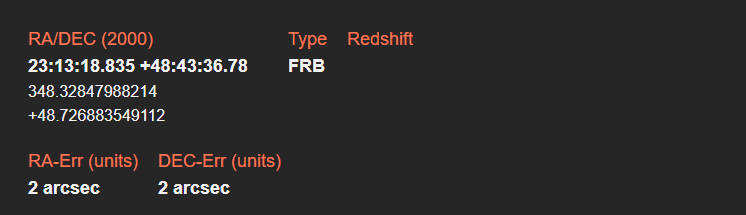

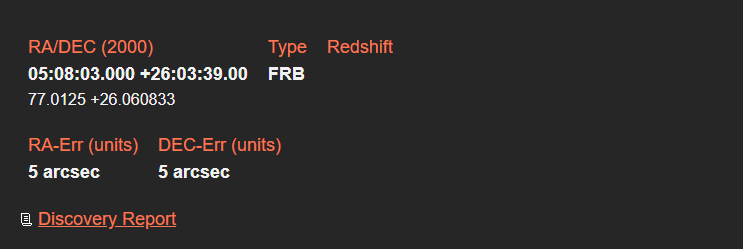

In [39]:
FRB_ICRS

<SkyCoord (ICRS): (ra, dec) in deg
    [(348.32847917,  48.72688333), (348.48064583,  48.72655556),
     ( 77.0125    ,  26.06083333), ( 77.0125    ,  26.06083333),
     ( 77.0125    ,  26.06083333), ( 77.0125    ,  26.06083333),
     ( 77.0125    ,  26.06083333), ( 77.0125    ,  26.06083333),
     ( 77.0125    ,  26.06083333), ( 77.0125    ,  26.06083333),
     ( 77.0125    ,  26.06083333), ( 77.0125    ,  26.06083333),
     ( 77.0375    ,  26.14555556), ( 77.0125    ,  26.06083333),
     ( 77.0125    ,  26.06083333), ( 76.97916667,  26.03333333),
     ( 77.0125    ,  26.06083333), ( 76.75      ,  25.88333333),
     ( 77.12      ,  26.19      ), ( 77.14      ,  26.19      ),
     ( 77.14      ,  26.19      ), ( 75.91      ,  26.19      ),
     ( 76.79      ,  26.19      ), ( 78.32      ,  26.2       ),
     ( 77.09      ,  26.19      ), ( 76.96      ,  26.19      ),
     ( 75.48      ,  26.18      ), ( 76.95      ,  26.19      ),
     ( 76.91      ,  26.19      ), ( 78.49      ,  26.2

### Map

#### J2000

In [40]:
FRB_ICRS

<SkyCoord (ICRS): (ra, dec) in deg
    [(348.32847917,  48.72688333), (348.48064583,  48.72655556),
     ( 77.0125    ,  26.06083333), ( 77.0125    ,  26.06083333),
     ( 77.0125    ,  26.06083333), ( 77.0125    ,  26.06083333),
     ( 77.0125    ,  26.06083333), ( 77.0125    ,  26.06083333),
     ( 77.0125    ,  26.06083333), ( 77.0125    ,  26.06083333),
     ( 77.0125    ,  26.06083333), ( 77.0125    ,  26.06083333),
     ( 77.0375    ,  26.14555556), ( 77.0125    ,  26.06083333),
     ( 77.0125    ,  26.06083333), ( 76.97916667,  26.03333333),
     ( 77.0125    ,  26.06083333), ( 76.75      ,  25.88333333),
     ( 77.12      ,  26.19      ), ( 77.14      ,  26.19      ),
     ( 77.14      ,  26.19      ), ( 75.91      ,  26.19      ),
     ( 76.79      ,  26.19      ), ( 78.32      ,  26.2       ),
     ( 77.09      ,  26.19      ), ( 76.96      ,  26.19      ),
     ( 75.48      ,  26.18      ), ( 76.95      ,  26.19      ),
     ( 76.91      ,  26.19      ), ( 78.49      ,  26.2

In [41]:
FRB_ICRS.ra.degree

array([348.32847917, 348.48064583,  77.0125    ,  77.0125    ,
        77.0125    ,  77.0125    ,  77.0125    ,  77.0125    ,
        77.0125    ,  77.0125    ,  77.0125    ,  77.0125    ,
        77.0375    ,  77.0125    ,  77.0125    ,  76.97916667,
        77.0125    ,  76.75      ,  77.12      ,  77.14      ,
        77.14      ,  75.91      ,  76.79      ,  78.32      ,
        77.09      ,  76.96      ,  75.48      ,  76.95      ,
        76.91      ,  78.49      , 149.43      ,  77.11      ,
        76.99      , 149.1       ,  29.50264167,  29.503125  ,
        29.503125  ,  24.77      ,  29.503125  ,  29.503125  ,
       283.61      , 122.37      ,  65.17      ,  58.66      ,
        33.76      ,  29.503125  ,  29.503125  ,  29.503125  ,
        29.85      ,  25.77      ,  31.98      ,  29.48      ,
        29.64      ,  29.01      ,  21.64      ,  29.49      ,
       294.99      , 283.35      , 159.19      , 158.94      ,
       152.89      , 152.81      , 158.21      , 157.87

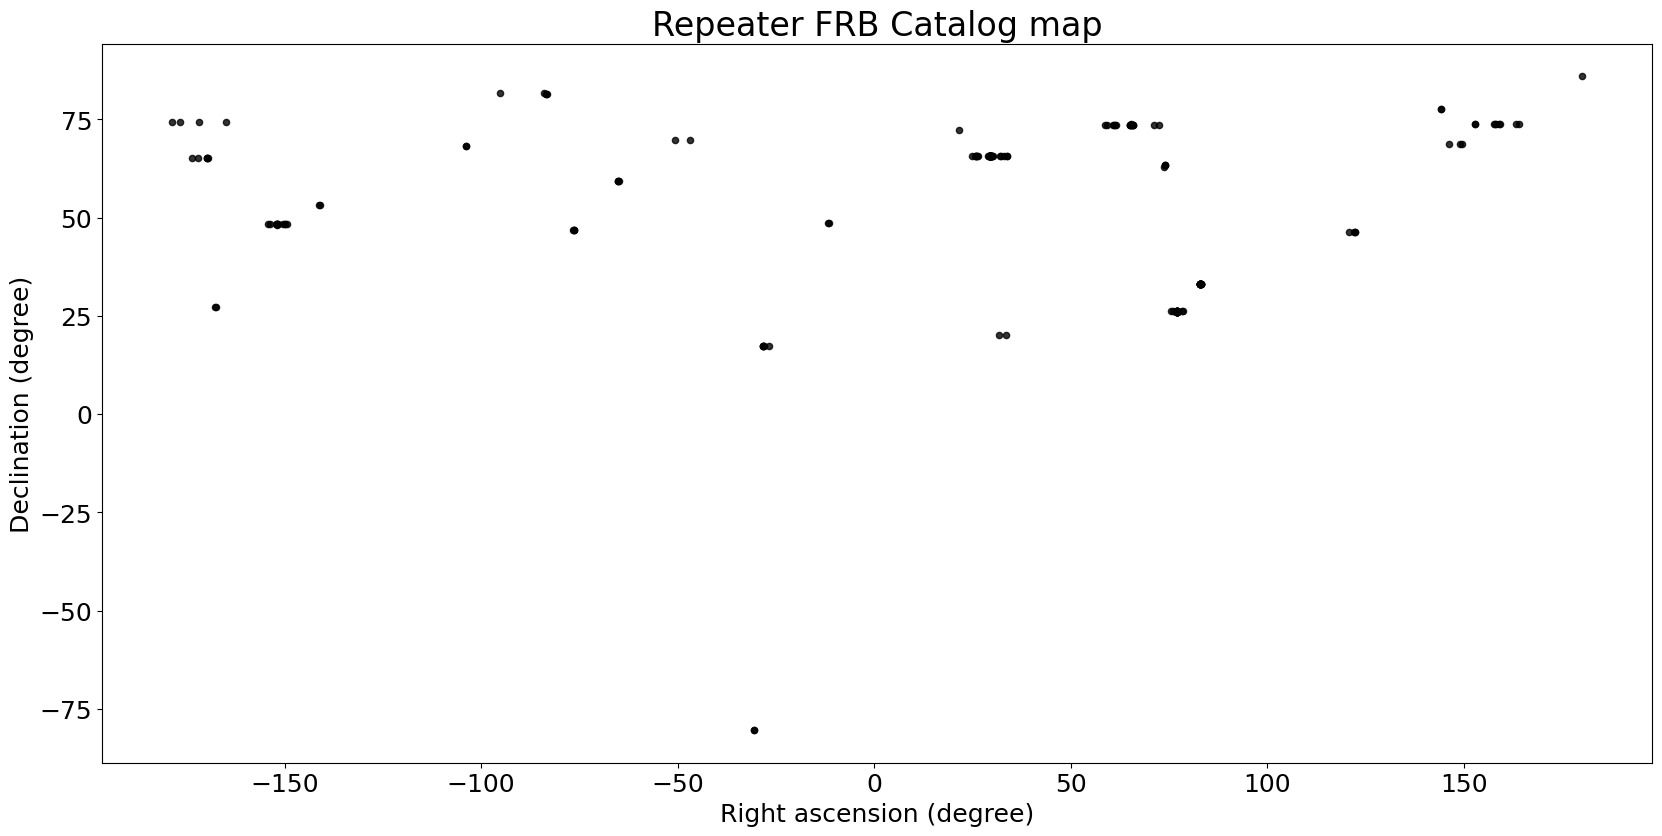

In [42]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1, aspect='equal')
ax.scatter(FRB_ICRS.ra.wrap_at('180d').degree, FRB_ICRS.dec.degree, s=20, color='black', alpha=0.8)
ax.set_xlabel("Right ascension (degree)", fontsize=18)
ax.set_ylabel("Declination (degree)", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_title("Repeater FRB Catalog map", fontsize=24)
plt.show()

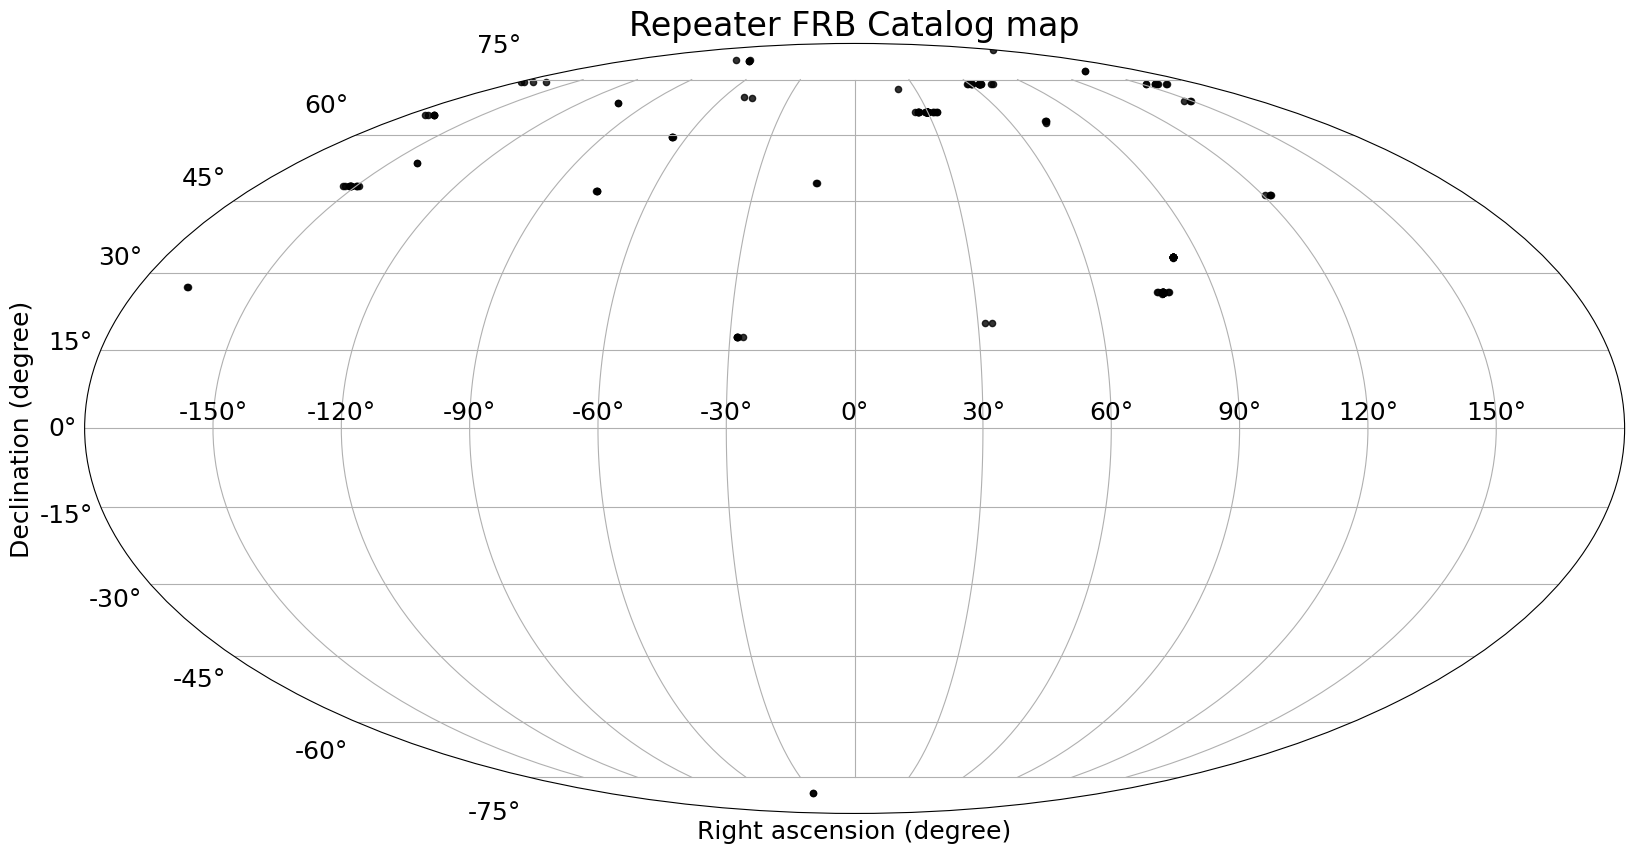

In [43]:
plt.figure(figsize=(20,10))
ax = plt.subplot(projection='mollweide')
ax.scatter(FRB_ICRS.ra.wrap_at('180d').radian, FRB_ICRS.dec.radian, s=20, color='black', alpha=0.8)
ax.grid(alpha=1)
ax.set_xlabel("Right ascension (degree)", fontsize=18)
ax.set_ylabel("Declination (degree)", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_title("Repeater FRB Catalog map", fontsize=24)
plt.show()

#### Galactic coordinate

In [44]:
FRB_Gal = FRB_ICRS.galactic
FRB_Gal

<SkyCoord (Galactic): (l, b) in deg
    [(106.72933291, -11.03348548), (106.82400152, -11.07147053),
     (177.76644565,  -8.52452385), (177.76644565,  -8.52452385),
     (177.76644565,  -8.52452385), (177.76644565,  -8.52452385),
     (177.76644565,  -8.52452385), (177.76644565,  -8.52452385),
     (177.76644565,  -8.52452385), (177.76644565,  -8.52452385),
     (177.76644565,  -8.52452385), (177.76644565,  -8.52452385),
     (177.71038127,  -8.45664774), (177.76644565,  -8.52452385),
     (177.76644565,  -8.52452385), (177.77119952,  -8.56490973),
     (177.76644565,  -8.52452385), (177.77154405,  -8.81977253),
     (177.71786569,  -8.37060677), (177.7284941 ,  -8.35606335),
     (177.7284941 ,  -8.35606335), (177.06910818,  -9.24690193),
     (177.54205433,  -8.61029746), (178.34196786,  -7.48889615),
     (177.70191733,  -8.39241833), (177.63272817,  -8.48688548),
     (176.84393371,  -9.56257045), (177.62740056,  -8.49414884),
     (177.60608245,  -8.52319749), (178.43066851,  -7.

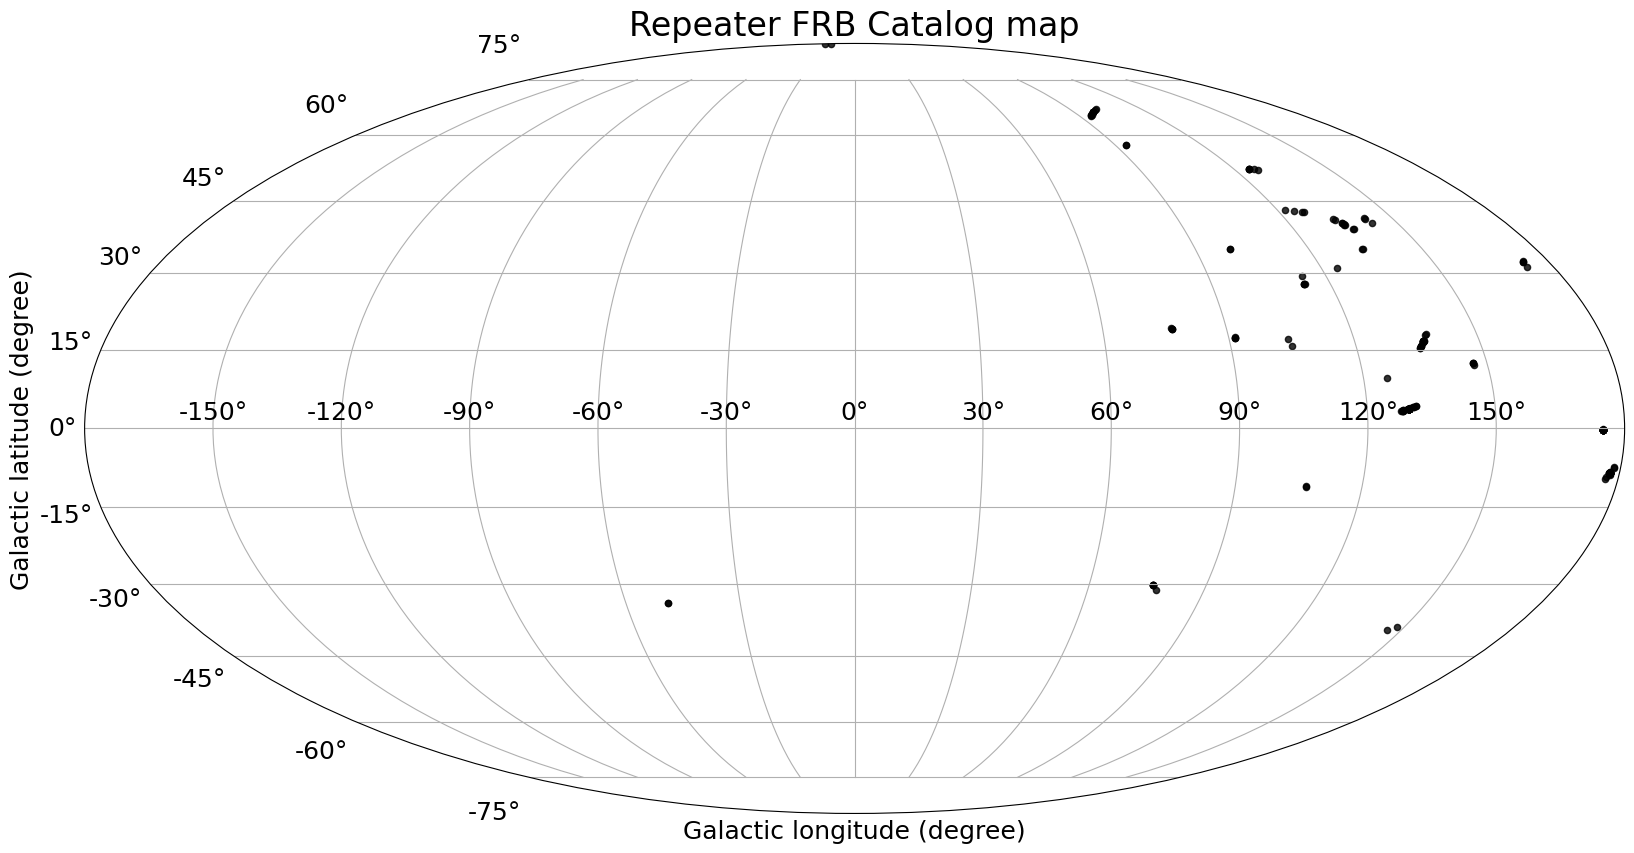

In [45]:
plt.figure(figsize=(20,10))
ax = plt.subplot(projection='mollweide')
ax.scatter(FRB_Gal.l.wrap_at('180d').radian, FRB_Gal.b.radian, s=20, color='black', alpha=0.8)
ax.grid(alpha=1)
ax.set_xlabel("Galactic longitude (degree)", fontsize=18)
ax.set_ylabel("Galactic latitude (degree)", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_title("Repeater FRB Catalog map", fontsize=24)
plt.show()

## Input non-repeater FRB catalog map 

In [46]:
df_non  = pd.read_excel('Catalogs/Non_Repeater_FRB.xlsx',header=None, names = name, skiprows=[0])
df_non

ID           Name            RA           DEC Obj. Type  \
0    121242  FRB 20221128A  07:30:00.000  -41:31:59.00       FRB   
1    119850  FRB 20221106A  03:46:38.100  -25:39:44.90       FRB   
2    116135  FRB 20220918A  01:10:57.900  -70:47:05.90       FRB   
3    124445  FRB 20220914A  18:48:13.630  +73:20:12.89       FRB   
4    112545  FRB 20220725A  22:26:60.000  +34:52:60.00       FRB   
..      ...            ...           ...           ...       ...   
627   55603  FRB 20181202A  23:24:09.600  +17:21:36.00       FRB   
628   55602  FRB 20181201B  18:13:31.200  +56:18:36.00       FRB   
629   55601  FRB 20181201A  14:19:52.800  +39:16:12.00       FRB   
630   76918  FRB 20181130B  00:39:07.850  +19:24:31.70       FRB   
631   55600  FRB 20181130A  23:43:50.400  +46:19:12.00       FRB   

     Repeater of Primary Burst        DM  DM-Err DM-Units  Gal. DM Limit  ...  \
0                          NaN   506.000     NaN    pc/cc            NaN  ...   
1                          NaN   343.800    0.80    pc/cc            NaN  ...   
2                          NaN   656.800    0.40    pc/cc            NaN  ...   
3                          NaN   630.703     NaN    pc/cc            NaN  ...   
4                          NaN   290.400    0.30    pc/cc            NaN  ...   
..                         ...       ...     ...      ...            ...  ...   
627                        NaN   669.640    3.23    pc/cc          39.00  ...   
628                        NaN   875.070    1.62    pc/cc          51.45  ...   
629                        NaN   698.740   25.88    pc/cc          24.06  ...   
630                        NaN  1705.500    6.50    pc/cc          38.16  ...   
631                        NaN   218.360    1.62    pc/cc          93.82  ...   

    Public End Prop. Period  Discovery Mag/Flux Discovery Filter  \
0        1              NaT                32.0           Other-   
1        1              NaT                 0.0           Other-   
2        1              NaT                 0.0           Other-   
3        1              NaT                 0.0   L-Band-DSA-110   
4        1              NaT                 0.0           Other-   
..     ...              ...                 ...              ...   
627      1       2021-06-09                 NaN              NaN   
628      1       2021-06-09                 NaN              NaN   
629      1       2021-06-09                 NaN              NaN   
630      1              NaT                20.6           Other-   
631      1       2021-06-09                 NaN              NaN   

        Discovery Date (UT)         Sender Remarks    Discovery Bibcode  \
0   2022-11-28 17:02:22.720        Mandlik     NaN  2022TNSFR3497....1M   
1   2022-11-06 21:27:33.197        Shannon     NaN  2022TNSFR3302....1S   
2   2022-09-18 17:33:33.736        Shannon     NaN  2022TNSFR2708....1S   
3   2022-09-14 03:30:11.472        DSA-110     NaN  2023TNSFR.294....1L   
4   2022-07-25 21:54:53.056        Shannon     NaN  2022TNSFR2108....1S   
..                      ...            ...     ...                  ...   
627 2018-12-02 02:41:41.658  CHIME_FRB_bot     NaN  2021TNSFR2007....1Z   
628 2018-12-01 21:26:35.313  CHIME_FRB_bot     NaN  2021TNSFR2007....1Z   
629 2018-12-01 17:39:05.355  CHIME_FRB_bot     NaN  2021TNSFR2007....1Z   
630 2018-11-30 00:00:00.000            Niu     NaN  2021TNSFR.421....1N   
631 2018-11-30 03:03:09.568  CHIME_FRB_bot     NaN  2021TNSFR2007....1Z   

    Classification Bibcodes Ext. catalog/s  
0                       NaN            NaN  
1                       NaN            NaN  
2                       NaN            NaN  
3                       NaN            NaN  
4                       NaN            NaN  
..                      ...            ...  
627                     NaN            NaN  
628                     NaN            NaN  
629                     NaN            NaN  
630                     NaN            NaN  
631   

### SkyCoord hours to degrees

In [47]:
RA_Non_Repeater = df_non['RA']
RA_Non_Repeater

0      07:30:00.000
1      03:46:38.100
2      01:10:57.900
3      18:48:13.630
4      22:26:60.000
           ...     
627    23:24:09.600
628    18:13:31.200
629    14:19:52.800
630    00:39:07.850
631    23:43:50.400
Name: RA, Length: 632, dtype: object

In [48]:
DEC_Repeater = df_non['DEC']
DEC_Repeater

0      -41:31:59.00
1      -25:39:44.90
2      -70:47:05.90
3      +73:20:12.89
4      +34:52:60.00
           ...     
627    +17:21:36.00
628    +56:18:36.00
629    +39:16:12.00
630    +19:24:31.70
631    +46:19:12.00
Name: DEC, Length: 632, dtype: object

In [49]:
u.hourangle

Unit("hourangle")

In [50]:
FRB_Non_ICRS = SkyCoord(RA_Non_Repeater, DEC_Repeater,frame='icrs', unit=(u.hourangle, u.deg))
FRB_Non_ICRS 

<SkyCoord (ICRS): (ra, dec) in deg
    [(112.5       , -41.53305556), ( 56.65875   , -25.66247222),
     ( 17.74125   , -70.78497222), (282.05679167,  73.33691389),
     (336.75      ,  34.88333333), (351.        , -33.51666667),
     (294.70916667, -60.29672222), (282.67      ,  70.24383333),
     (352.45833333, -32.45      ), (196.0875    ,  48.30138889),
     ( 32.1779    ,  71.035     ), (310.199525  ,  72.88232778),
     (208.96416667,  22.48880556), (157.66958333,   1.67688889),
     (204.47      , -31.36777778), (199.78958333, -18.82455556),
     (351.16791667, -30.49252778), (271.15708333,   1.32875   ),
     (299.20416667,  -0.81427778), (260.78087083,   7.861625  ),
     (326.08625   , -79.31819444), (204.32604167, -28.28413889),
     ( 78.69291667,  27.07008333), (255.33958333, -49.54522222),
     (204.32      , -15.41036111), (333.96791667, -46.09222222),
     (  6.92916667,  -5.83222222), (191.74      ,  83.12      ),
     ( 53.99      ,  52.73      ), (296.70308333, -54.2

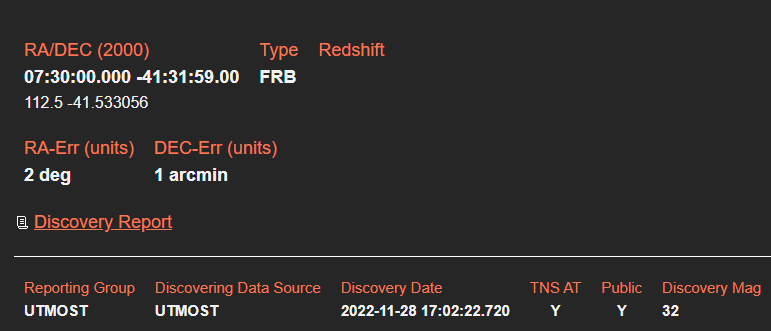

In [51]:
FRB_Non_ICRS[0]

<SkyCoord (ICRS): (ra, dec) in deg
    (112.5, -41.53305556)>

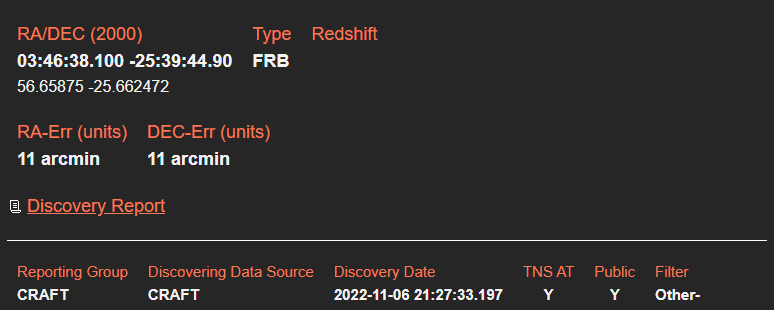

In [52]:
FRB_Non_ICRS[1]

<SkyCoord (ICRS): (ra, dec) in deg
    (56.65875, -25.66247222)>

### Map

#### J2000

In [53]:
FRB_Non_ICRS

<SkyCoord (ICRS): (ra, dec) in deg
    [(112.5       , -41.53305556), ( 56.65875   , -25.66247222),
     ( 17.74125   , -70.78497222), (282.05679167,  73.33691389),
     (336.75      ,  34.88333333), (351.        , -33.51666667),
     (294.70916667, -60.29672222), (282.67      ,  70.24383333),
     (352.45833333, -32.45      ), (196.0875    ,  48.30138889),
     ( 32.1779    ,  71.035     ), (310.199525  ,  72.88232778),
     (208.96416667,  22.48880556), (157.66958333,   1.67688889),
     (204.47      , -31.36777778), (199.78958333, -18.82455556),
     (351.16791667, -30.49252778), (271.15708333,   1.32875   ),
     (299.20416667,  -0.81427778), (260.78087083,   7.861625  ),
     (326.08625   , -79.31819444), (204.32604167, -28.28413889),
     ( 78.69291667,  27.07008333), (255.33958333, -49.54522222),
     (204.32      , -15.41036111), (333.96791667, -46.09222222),
     (  6.92916667,  -5.83222222), (191.74      ,  83.12      ),
     ( 53.99      ,  52.73      ), (296.70308333, -54.2

In [54]:
FRB_Non_ICRS.ra.degree

array([112.5       ,  56.65875   ,  17.74125   , 282.05679167,
       336.75      , 351.        , 294.70916667, 282.67      ,
       352.45833333, 196.0875    ,  32.1779    , 310.199525  ,
       208.96416667, 157.66958333, 204.47      , 199.78958333,
       351.16791667, 271.15708333, 299.20416667, 260.78087083,
       326.08625   , 204.32604167,  78.69291667, 255.33958333,
       204.32      , 333.96791667,   6.92916667, 191.74      ,
        53.99      , 296.70308333, 339.9       ,  67.439625  ,
       263.669     , 207.8528    , 314.38      ,  42.41      ,
        53.75      , 326.75      , 295.532375  , 205.37770833,
       105.25229167, 135.38495833, 229.67083333, 328.57      ,
       198.36466667, 219.13158333, 344.25      , 308.55891667,
        44.34      , 226.29      , 246.03      , 306.44      ,
       355.13      , 215.73      , 269.09      , 157.25      ,
       243.62      , 262.85      , 147.96      , 318.57      ,
       175.94      ,  76.52816667, 300.06      , 283.74

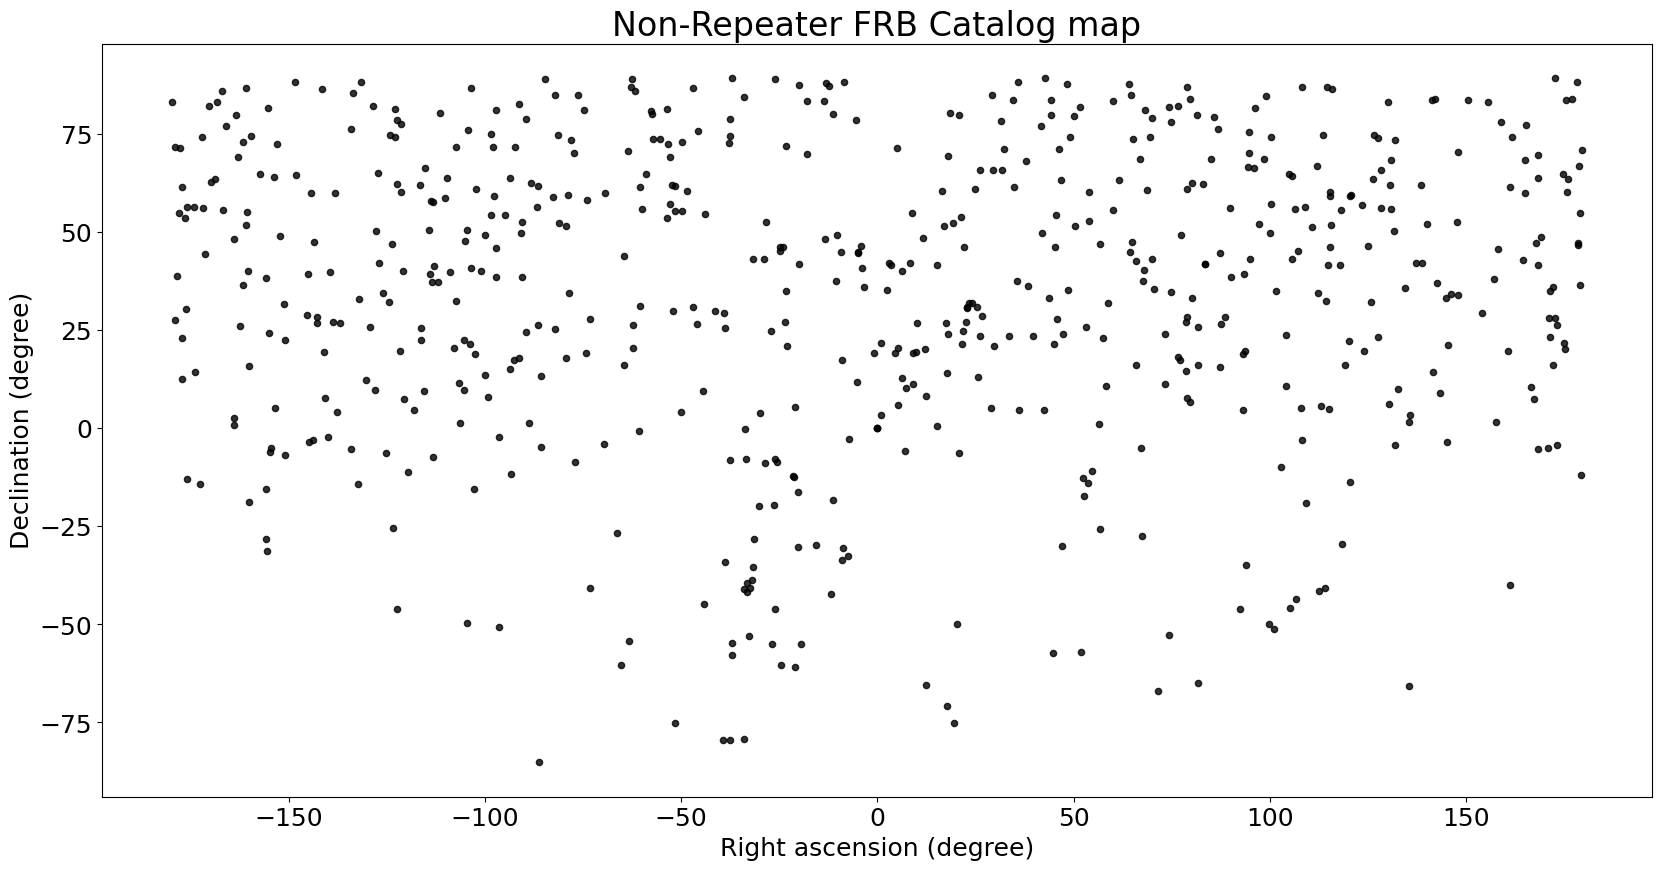

In [55]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1, aspect='equal')
ax.scatter(FRB_Non_ICRS.ra.wrap_at('180d').degree, FRB_Non_ICRS.dec.degree, s=20, color='black', alpha=0.8)
ax.set_xlabel("Right ascension (degree)", fontsize=18)
ax.set_ylabel("Declination (degree)", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_title("Non-Repeater FRB Catalog map", fontsize=24)
plt.show()

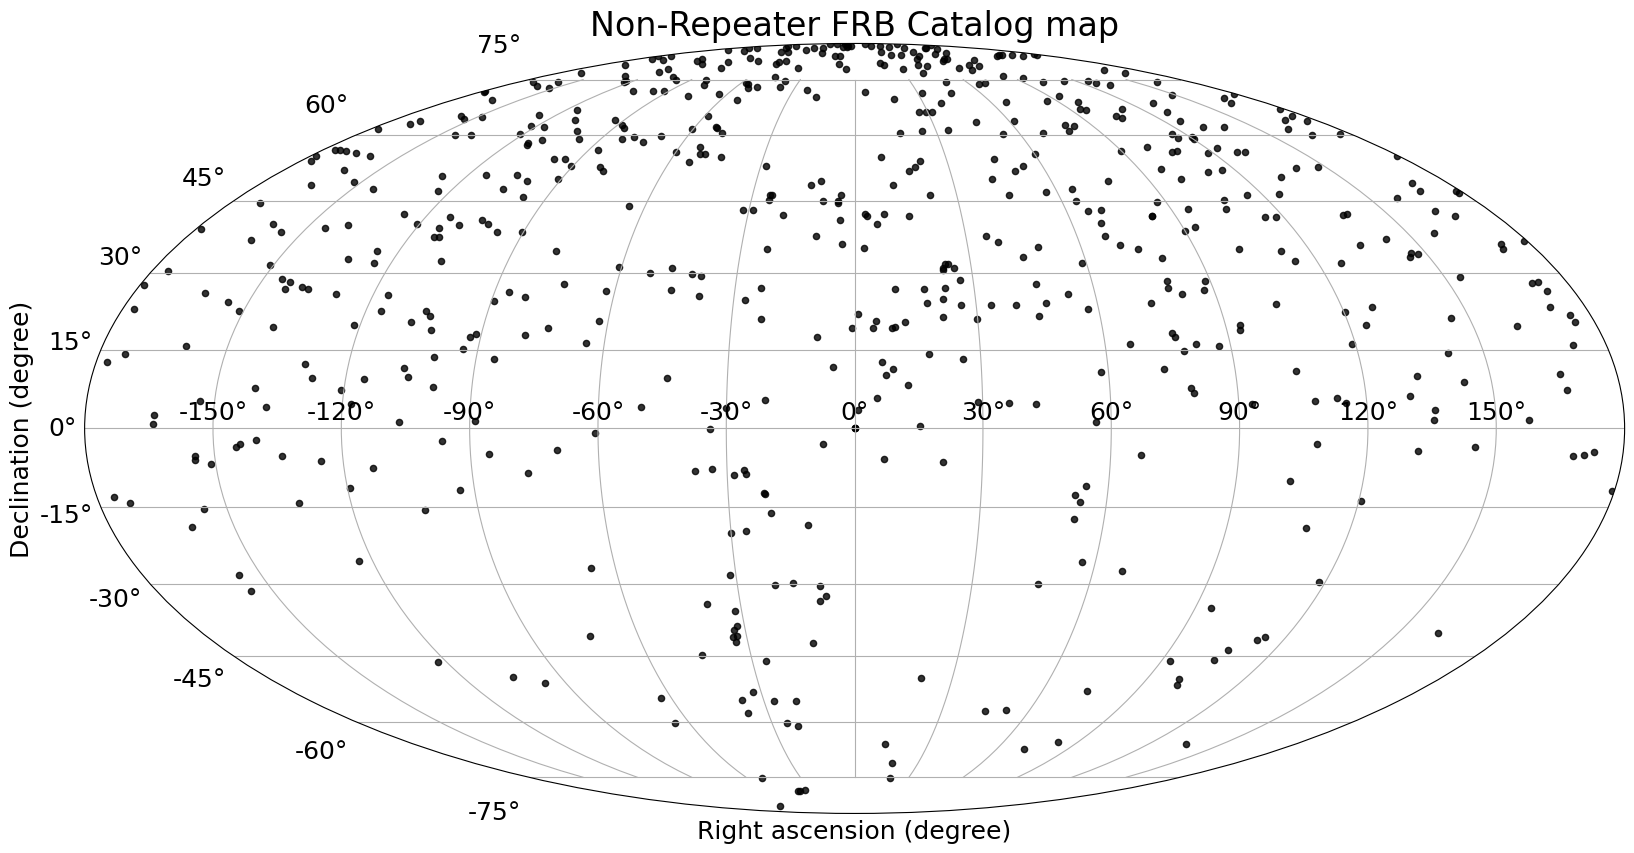

In [56]:
plt.figure(figsize=(20,10))
ax = plt.subplot(projection='mollweide')
ax.scatter(FRB_Non_ICRS.ra.wrap_at('180d').radian, FRB_Non_ICRS.dec.radian, s=20, color='black', alpha=0.8)
ax.grid(alpha=1)
ax.set_xlabel("Right ascension (degree)", fontsize=18)
ax.set_ylabel("Declination (degree)", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_title("Non-Repeater FRB Catalog map", fontsize=24)
plt.show()

#### Galactic coordinate

In [57]:
FRB_Non_Gal = FRB_Non_ICRS.galactic
FRB_Non_Gal

<SkyCoord (Galactic): (l, b) in deg
    [(254.18458285, -10.99781411), (221.03065683, -50.93902353),
     (300.6104822 , -46.25516306), (104.30803694,  26.13010554),
     ( 92.13842544, -19.21053934), (  8.87140375, -70.12559821),
     (336.65012614, -29.11901688), (100.94319405,  25.47640054),
     ( 11.26168576, -71.54661957), (117.01889113,  68.67834963),
     (129.18298317,   9.1070596 ), (106.93849783,  18.38959246),
     ( 18.83744461,  74.67737317), (243.95583528,  47.76308605),
     (314.4318785 ,  30.46477738), (311.99927169,  43.5586107 ),
     ( 17.73601386, -70.72936791), ( 28.73577161,  11.01348107),
     ( 39.80537836, -14.88685387), ( 29.93555032,  23.18822715),
     (312.32221628, -34.12939579), (315.0512871 ,  33.5059193 ),
     (177.819216  ,  -6.71489971), (338.19193307,  -4.59685189),
     (318.94759922,  46.03096458), (350.71307211, -53.98961585),
     (107.02912916, -67.96855085), (123.09368516,  34.00684593),
     (146.4289259 ,  -2.46894027), (343.69964811, -29.

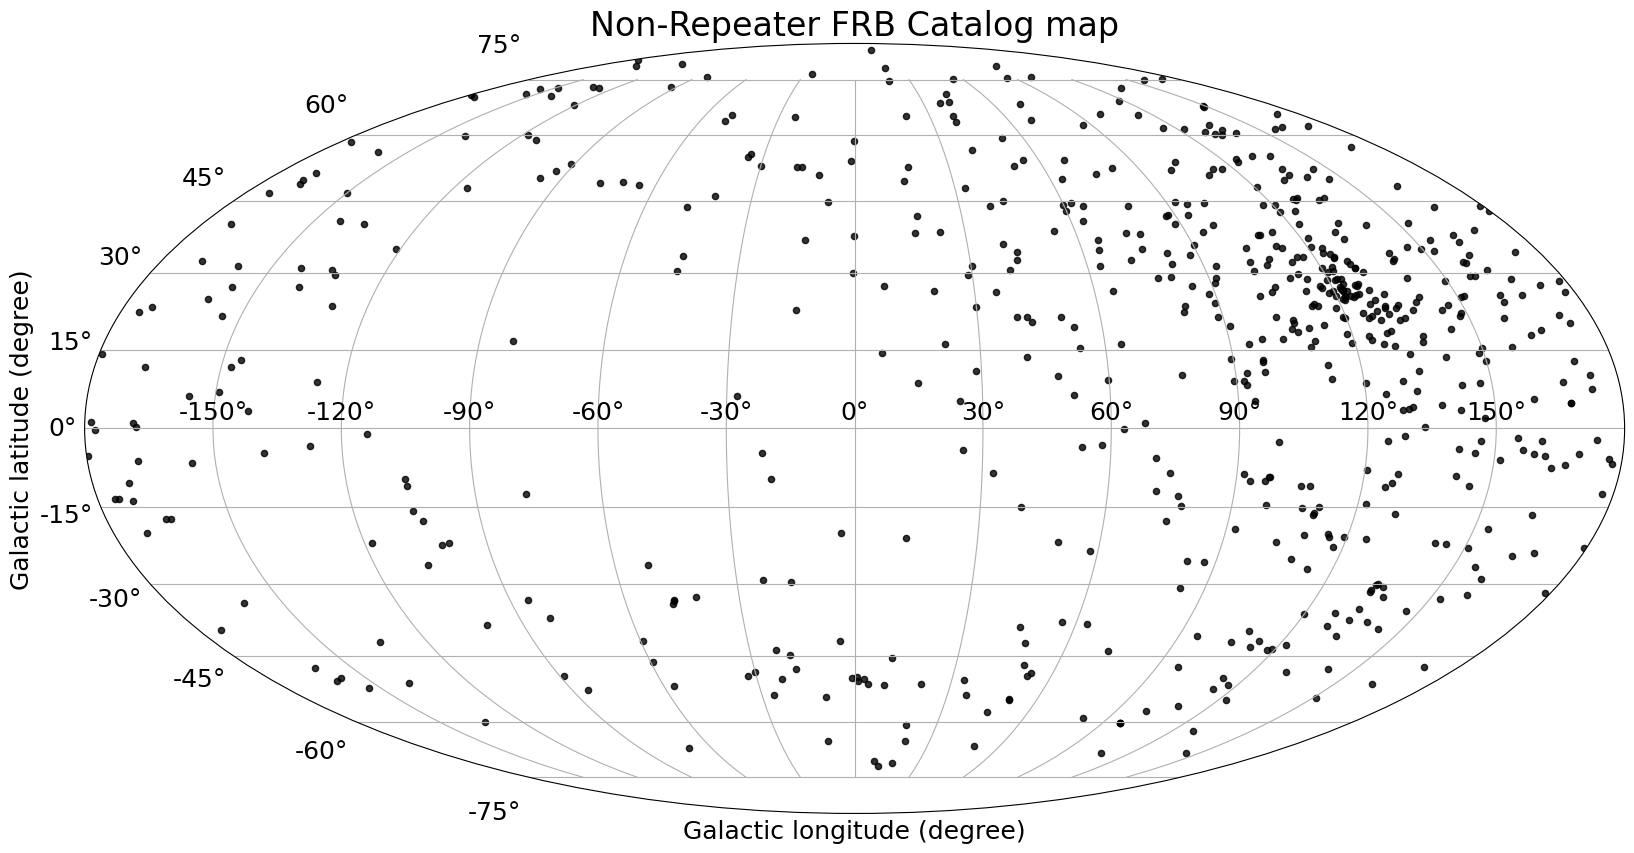

In [58]:
plt.figure(figsize=(20,10))
ax = plt.subplot(projection='mollweide')
ax.scatter(FRB_Non_Gal.l.wrap_at('180d').radian, FRB_Non_Gal.b.radian, s=20, color='black', alpha=0.8)
ax.grid(alpha=1)
ax.set_xlabel("Galactic longitude (degree)", fontsize=18)
ax.set_ylabel("Galactic latitude (degree)", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_title("Non-Repeater FRB Catalog map", fontsize=24)
plt.show()

# Combined maps

## J2000

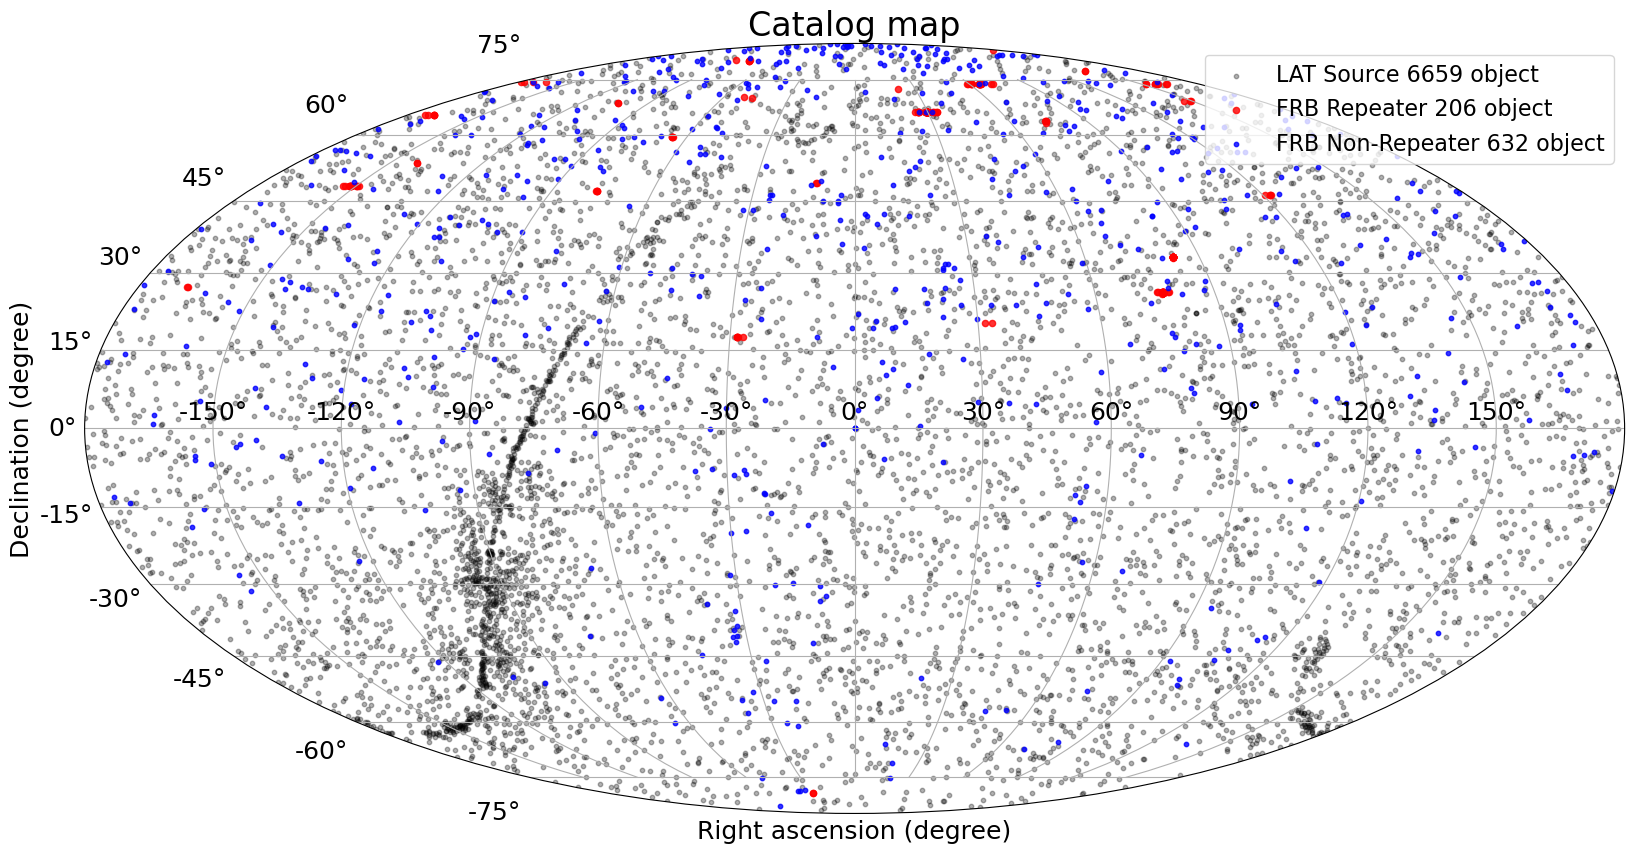

In [64]:
# Fermi
plt.figure(figsize=(20,10))
ax = plt.subplot(projection='mollweide')
ax.scatter(Fermi_ICRS.ra.wrap_at('180d').radian, Fermi_ICRS.dec.radian, s=10, color='black', alpha=0.3,label='LAT Source %s object'%len(Fermi_ICRS))

# Repeater
ax.scatter(FRB_ICRS.ra.wrap_at('180d').radian, FRB_ICRS.dec.radian, s=20, color='red', alpha=0.8,label='FRB Repeater %s object'%len(FRB_ICRS))

# Non-repeater
ax.scatter(FRB_Non_ICRS.ra.wrap_at('180d').radian, FRB_Non_ICRS.dec.radian, s=10, color='blue', alpha=0.8,label='FRB Non-Repeater %s object'%len(FRB_Non_ICRS))

ax.grid(alpha=1)
ax.legend(fontsize=16,loc='upper right')
ax.set_xlabel("Right ascension (degree)", fontsize=18)
ax.set_ylabel("Declination (degree)", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_title("Catalog map", fontsize=24)
plt.savefig('Catalog map in ICRS.png')
plt.show()

## Galactic coordinate

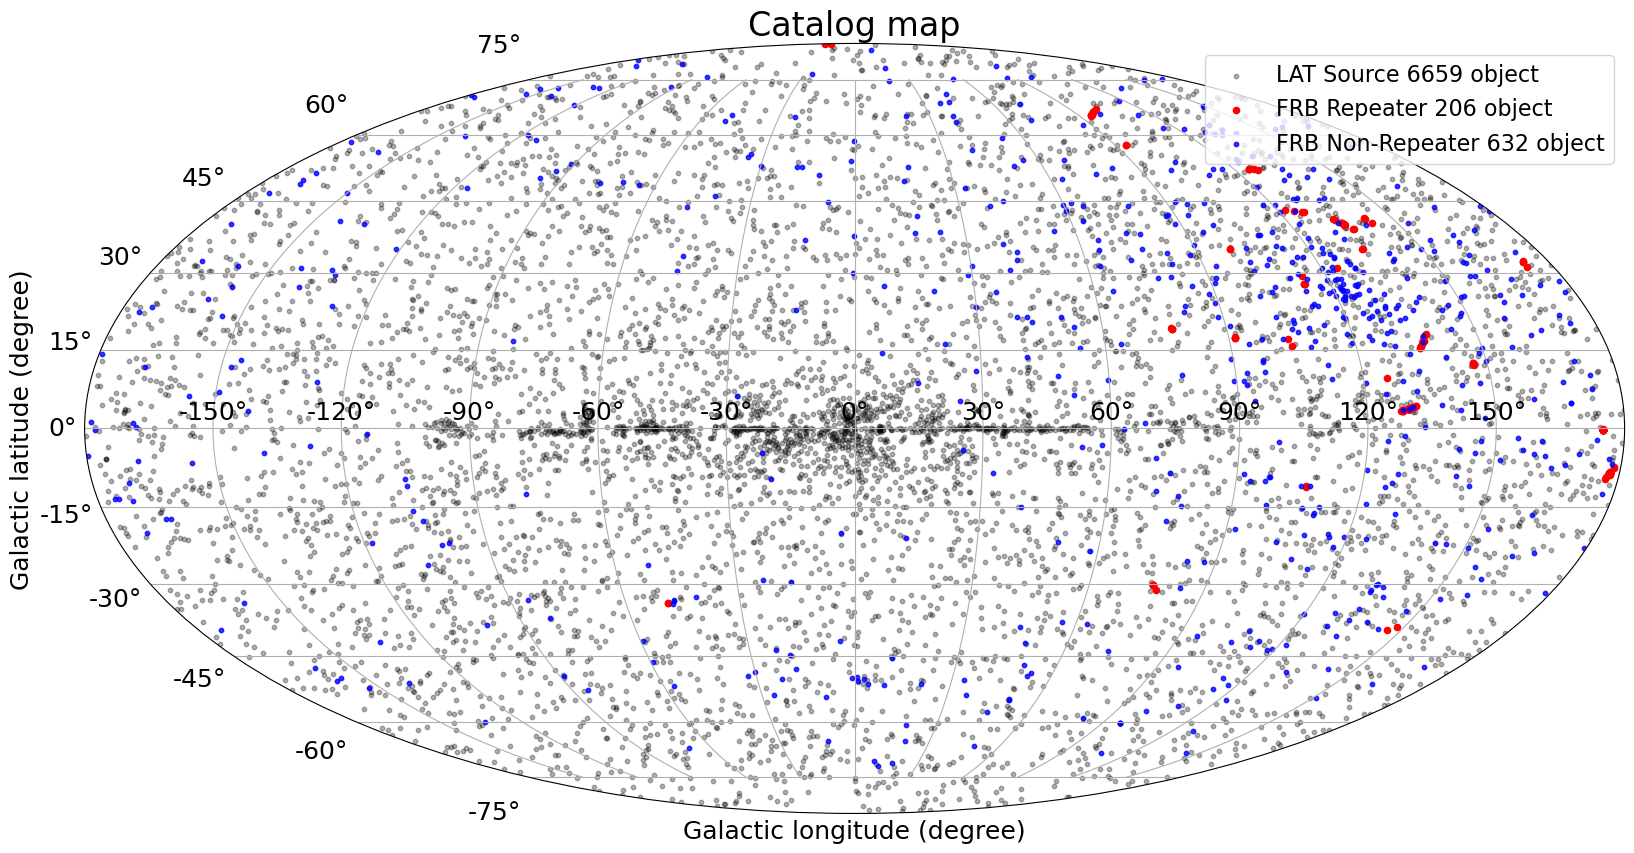

In [63]:
# Fermi
plt.figure(figsize=(20,10))
ax = plt.subplot(projection='mollweide')
ax.scatter(Fermi_Gal.l.wrap_at('180d').radian, Fermi_Gal.b.radian, s=10, color='black', alpha=0.3,label='LAT Source %s object'%len(Fermi_Gal))
# Repeater
ax.scatter(FRB_Gal.l.wrap_at('180d').radian, FRB_Gal.b.radian, s=20, color='red', alpha=1,label='FRB Repeater %s object'%len(FRB_Gal))
# Non-repeater
ax.scatter(FRB_Non_Gal.l.wrap_at('180d').radian, FRB_Non_Gal.b.radian, s=10, color='blue', alpha=0.8,label='FRB Non-Repeater %s object'%len(FRB_Non_Gal))

ax.grid(alpha=1)
ax.legend(fontsize=16,loc='upper right')
ax.set_xlabel("Galactic longitude (degree)", fontsize=18)
ax.set_ylabel("Galactic latitude (degree)", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_title("Catalog map", fontsize=24)
plt.savefig('Catalog map in GAL.png')
plt.show()